# Project Title: Prediction of CO2 Emissions

In [35]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [36]:
#For displaying max number of rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Load the Dataset

In [37]:
df = pd.read_csv(r"/Users/krutarthyg/Desktop/Coding/BDA_project/CO2-Emission/Playground Series S3E20/train.csv")

In [38]:
#Reading first five records
df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                                 NaN                                 NaN   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   
2                          23.206415   
3                                NaN   
4                          24.331972   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   
2                                       0.000154   
3                                            NaN   
4                                      -0.000028   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   
2                                 0.035338   
3                                 0.036790   
4                                 0.034675   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   
2                               2703.236800                  2809.138386   
3                               2076.073332                  3917.707873   
4                               2053.608490                  2667.310013   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   829530.500000                            71.111977   
1                   829787.287130                            -1.019594   
2                   829883.828686                           -54.801144   
3                   829657.163571                            28.916541   
4                   829735.093750                           -12.501663   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [39]:
df.shape

(79023, 76)

There are 79023 Rows and 76 Columns in the dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

The dataset contains 2int columns and 1 object columns and remaining are float type. Also there are many null values present   
in the dataset

In [41]:
#Checking for the percentage of null values present
null = pd.DataFrame({"Percentage": df.isna().sum()/df.shape[0]*100}).sort_values("Percentage", ascending=False)
null = null.reset_index().rename(columns= {"index": 'Name'})
null

Name  Percentage
0                 UvAerosolLayerHeight_aerosol_height   99.444466
1             UvAerosolLayerHeight_solar_zenith_angle   99.444466
2            UvAerosolLayerHeight_solar_azimuth_angle   99.444466
3           UvAerosolLayerHeight_sensor_azimuth_angle   99.444466
4               UvAerosolLayerHeight_aerosol_pressure   99.444466
5          UvAerosolLayerHeight_aerosol_optical_depth   99.444466
6            UvAerosolLayerHeight_sensor_zenith_angle   99.444466
7                 NitrogenDioxide_tropopause_pressure   23.183124
8   NitrogenDioxide_stratospheric_NO2_column_numbe...   23.183124
9     NitrogenDioxide_NO2_slant_column_number_density   23.183124
10                     NitrogenDioxide_cloud_fraction   23.183124
11            NitrogenDioxide_absorbing_aerosol_index   23.183124
12          NitrogenDioxide_NO2_column_number_density   23.183124
13                    NitrogenDioxide_sensor_altitude   23.183124
14               NitrogenDioxide_sensor_azimuth_angle   23.183124
15                NitrogenDioxide_sensor_zenith_angle   23.183124
16                NitrogenDioxide_solar_azimuth_angle   23.183124
17  NitrogenDioxide_tropospheric_NO2_column_number...   23.183124
18                 NitrogenDioxide_solar_zenith_angle   23.183124
19      SulphurDioxide_SO2_column_number_density_15km   18.487023
20                  SulphurDioxide_solar_zenith_angle   18.487023
21                 SulphurDioxide_solar_azimuth_angle   18.487023
22                 SulphurDioxide_sensor_zenith_angle   18.487023
23                SulphurDioxide_sensor_azimuth_angle   18.487023
24                      SulphurDioxide_cloud_fraction   18.487023
25     SulphurDioxide_SO2_slant_column_number_density   18.487023
26       SulphurDioxide_SO2_column_number_density_amf   18.487023
27           SulphurDioxide_SO2_column_number_density   18.487023
28                   Formaldehyde_sensor_zenith_angle    9.208711
29                   Formaldehyde_solar_azimuth_angle    9.208711
30                        Formaldehyde_cloud_fraction    9.208711
31                  Formaldehyde_sensor_azimuth_angle    9.208711
32      Formaldehyde_HCHO_slant_column_number_density    9.208711
33                    Formaldehyde_solar_zenith_angle    9.208711
34  Formaldehyde_tropospheric_HCHO_column_number_d...    9.208711
35  Formaldehyde_tropospheric_HCHO_column_number_d...    9.208711
36                  CarbonMonoxide_solar_zenith_angle    2.685294
37            CarbonMonoxide_CO_column_number_density    2.685294
38                 CarbonMonoxide_solar_azimuth_angle    2.685294
39                 CarbonMonoxide_sensor_zenith_angle    2.685294
40                CarbonMonoxide_sensor_azimuth_angle    2.685294
41           CarbonMonoxide_H2O_column_number_density    2.685294
42                        CarbonMonoxide_cloud_height    2.685294
43                     CarbonMonoxide_sensor_altitude    2.685294
44                               Ozone_cloud_fraction    0.693469
45                     Ozone_O3_effective_temperature    0.693469
46                           Ozone_solar_zenith_angle    0.693469
47                          Ozone_solar_azimuth_angle    0.693469
48                          Ozone_sensor_zenith_angle    0.693469
49                         Ozone_sensor_azimuth_angle    0.693469
50                 Ozone_O3_column_number_density_amf    0.693469
51               Ozone_O3_slant_column_number_density    0.693469
52                     Ozone_O3_column_number_density    0.693469
53                  UvAerosolIndex_solar_zenith_angle    0.682080
54                 UvAerosolIndex_solar_azimuth_angle    0.682080
55                 UvAerosolIndex_sensor_zenith_angle    0.682080
56                UvAerosolIndex_sensor_azimuth_angle    0.682080
57                     UvAerosolIndex_sensor_altitude    0.682080
58             UvAerosolIndex_absorbing_aerosol_index    0.682080
59                               Cloud_cloud_fraction    0.612480
60                     

Null Values Observations:    
    1) "UvAerosolLayerHeight" related columns have more than 99% of null values. So we can drop them.  
    2) Also We will delete the rows having null values less then 5%.

In [42]:
# null[null['Percentage']>99]
drop_columns =list(null.loc[null['Percentage']>99, 'Name'])
drop_columns

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_solar_zenith_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle']

In [43]:
df.drop(columns= drop_columns, inplace=True)

In [44]:
df.shape

(79023, 69)

In [45]:
columns_row_drop= list(null.loc[null['Percentage']<5, 'Name'])

In [46]:
df.dropna(subset=columns_row_drop, inplace=True)

In [47]:
df.shape

(76895, 69)

Let's visualize the emission column

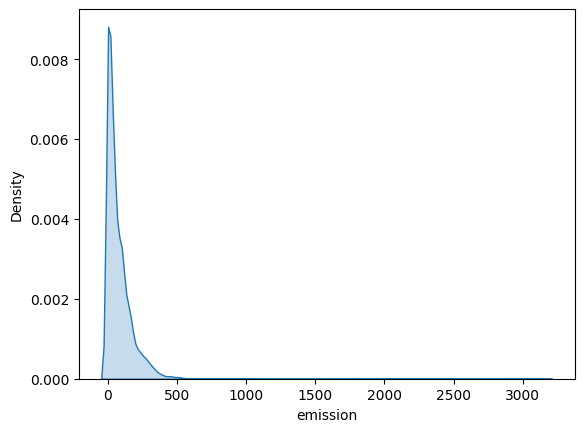

In [48]:
sns.kdeplot(data=df, x='emission', fill=True)
plt.show()

Visualizing emission column year wise

Text(0.5, 1.0, 'Year=2021')

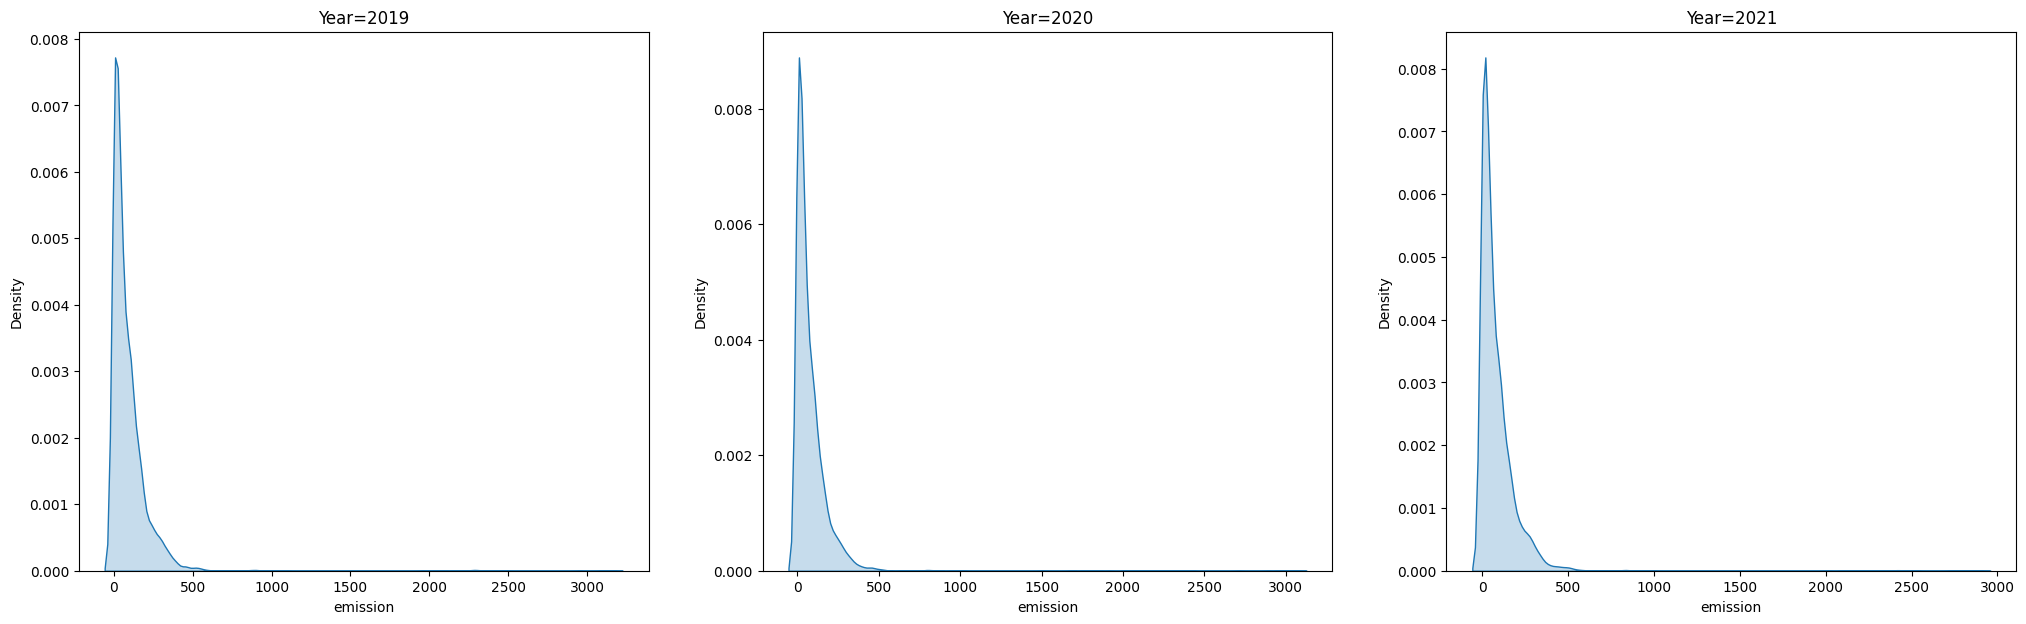

In [49]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))
sns.kdeplot(ax=axes[0], data= df[df['year'] ==2019], x='emission', fill=True).set_title('Year=2019')
sns.kdeplot(ax=axes[1], data= df[df['year'] ==2020], x='emission', fill=True).set_title('Year=2020')
sns.kdeplot(ax=axes[2], data= df[df['year'] ==2021], x='emission', fill=True).set_title('Year=2021')

The plot is right skewed

### Visualizing Weekly CO2 Emission year wise

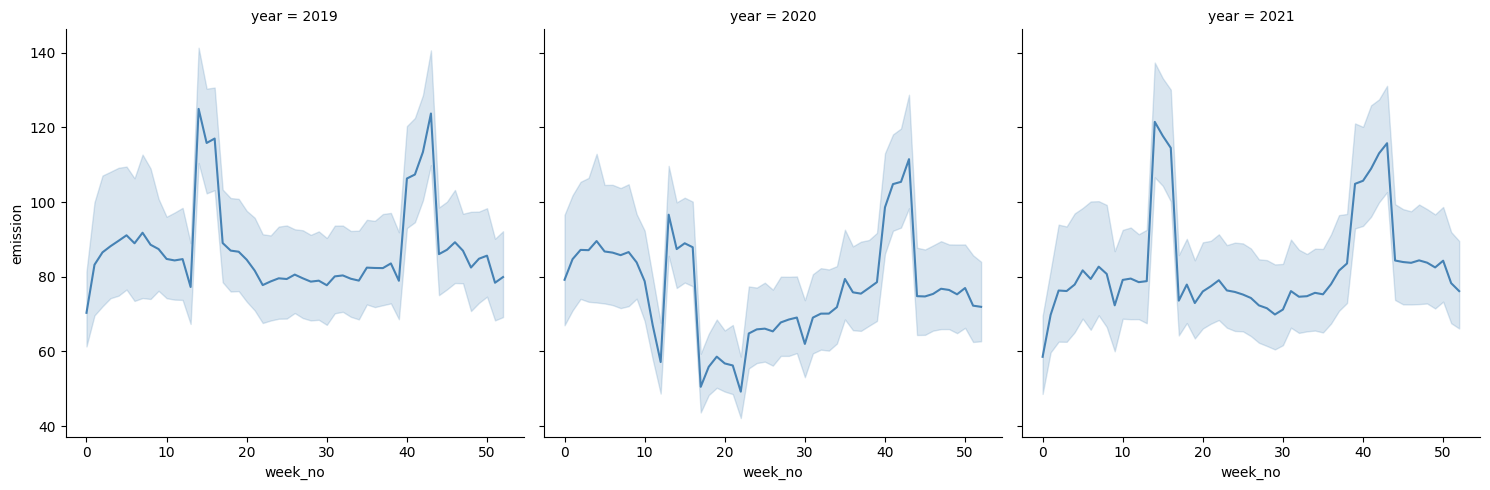

In [50]:

sns.relplot(data = df, x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'steelblue');

From the Weekly CO2 Emission plot, We get the following insights:  
    1) Year 2019 and 2021 have same pattern and frquency of Emission   
    2) Maximum CO2 emsission occurs in the week 14,15,16 (May) ,41,42,43,44 (Oct) every year.    
    3) CO2 Emission is less from week 18 to 22 in 2020 as compared to year 2019 and 2021.

Plotting on Map

In [51]:
import plotly.express as px
fig = px.scatter_mapbox(df[df['year'] == 2020], 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'emission',
                        animation_frame = 'week_no',
                        zoom = 6)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

## Correlations among the features and emission

### Finding the correlation among the SulphurDioxide features and Emission

In [52]:
corr_mat_sulpher= df[['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km', 'emission']].corr()

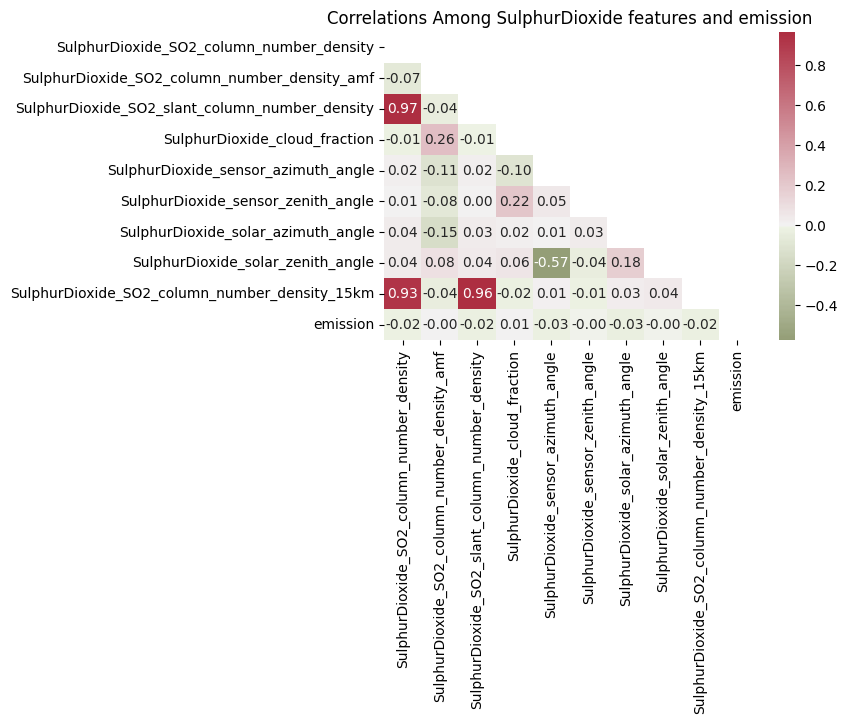

In [53]:
data_mask=np.triu(np.ones_like(corr_mat_sulpher, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat_sulpher, annot = True, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among SulphurDioxide features and emission')
plt.show()

There is no correlation bewteen SulphurDioxide features and emission

### Finding the correlation among the CarbonMonoxide features and Emission

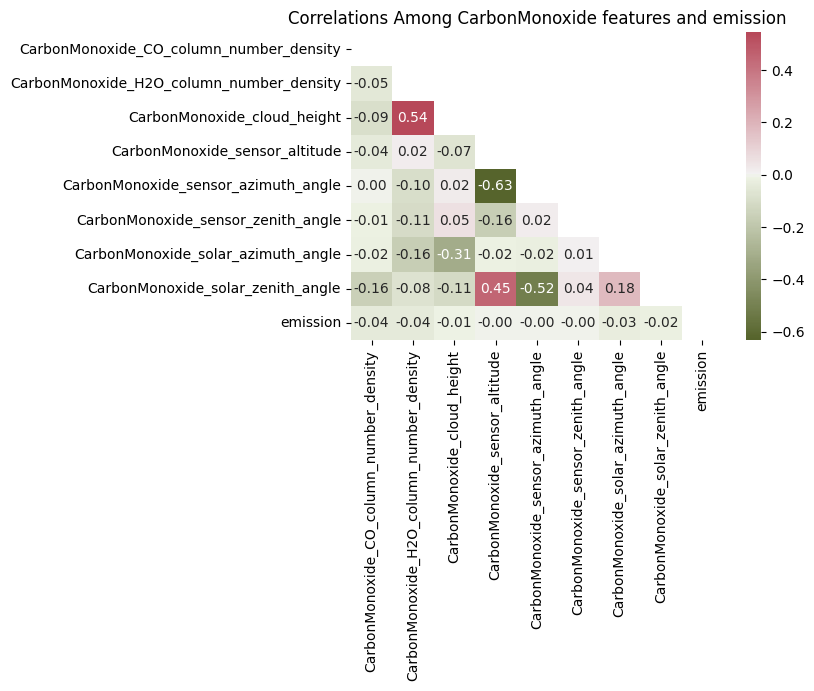

In [54]:
corr_mat_como = df[['CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle','emission']].corr()
data_mask=np.triu(np.ones_like(corr_mat_como, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat_como, annot = True, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among CarbonMonoxide features and emission')
plt.show()

There is no correlation bewteen Carbon Monoxide features and emission

### Finding the correlation among the NitrogenDioxide features and Emission

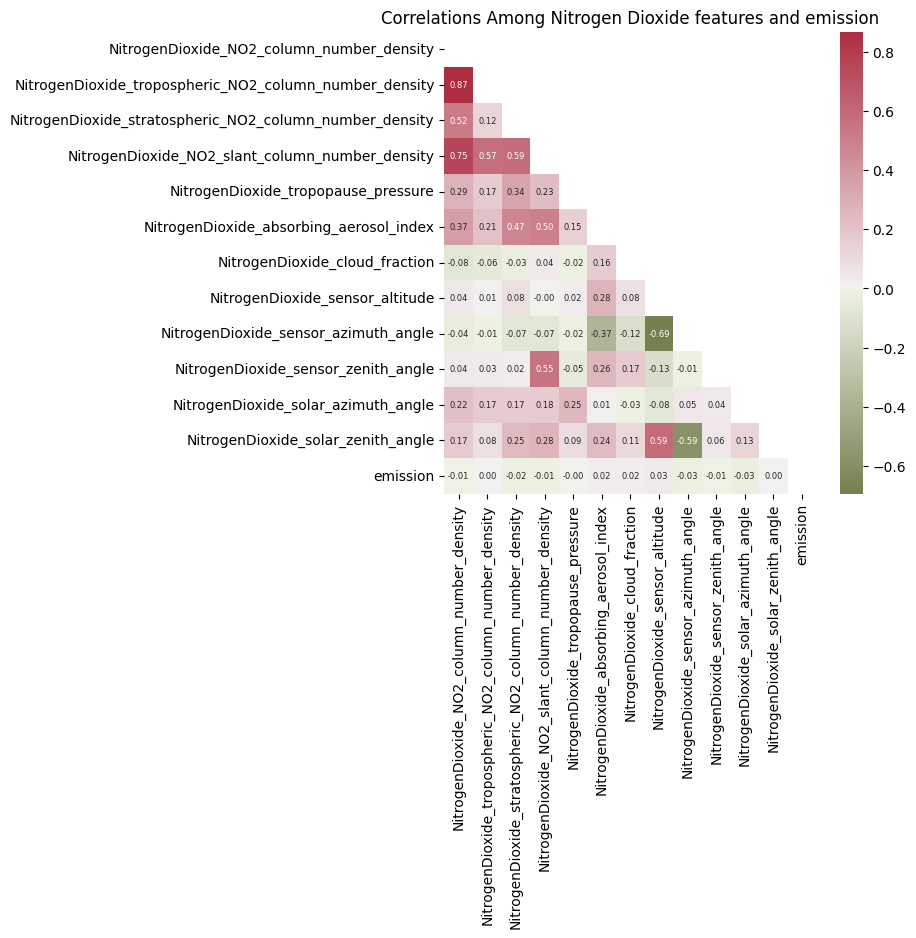

In [55]:
corr_mat_no2= df[['NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'NitrogenDioxide_solar_zenith_angle','emission']].corr()
data_mask=np.triu(np.ones_like(corr_mat_no2, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,6))
sns.heatmap(corr_mat_no2, annot = True, annot_kws={'size':6}, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among Nitrogen Dioxide features and emission')
plt.show()

There is no correlation bewteen NitrogenDioxide features and emission

### Finding the correlation among the Formaldehyde features and Emission

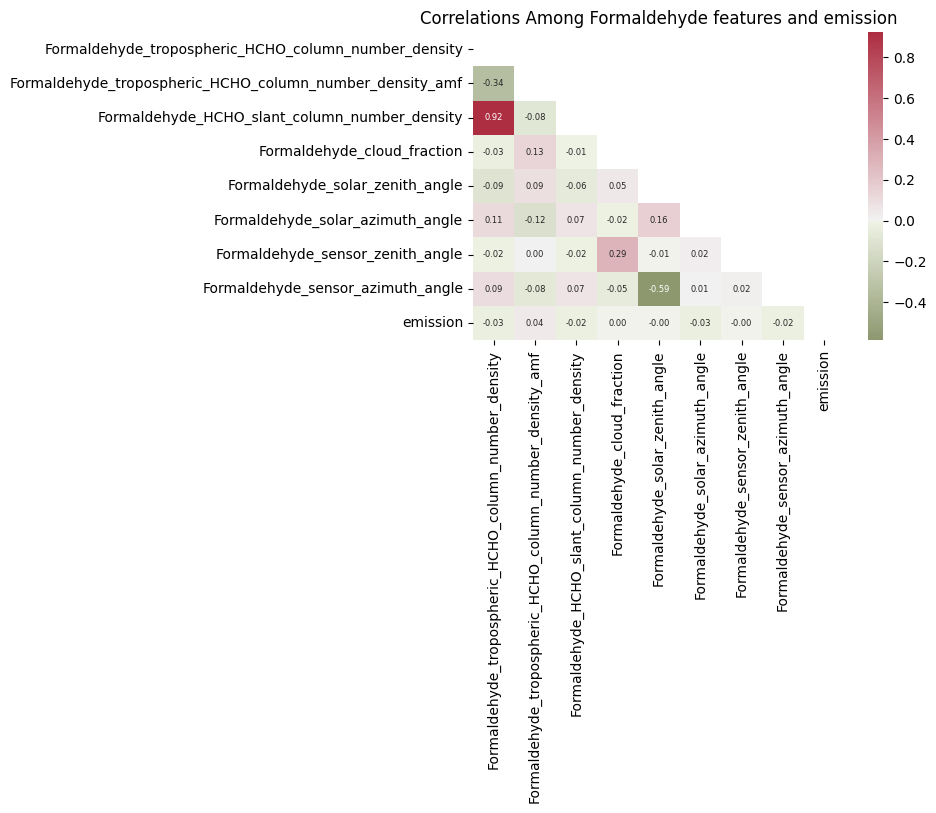

In [56]:
corr_mat_formaldeyde= df[['Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Formaldehyde_HCHO_slant_column_number_density',
       'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle','emission']].corr()
data_mask=np.triu(np.ones_like(corr_mat_formaldeyde, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat_formaldeyde, annot = True, annot_kws={'size':6}, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among Formaldehyde features and emission')
plt.show()

There is no correlation bewteen Formaldehyde features and emission

### Finding the correlation among the 'UvAerosolIndex features and Emission

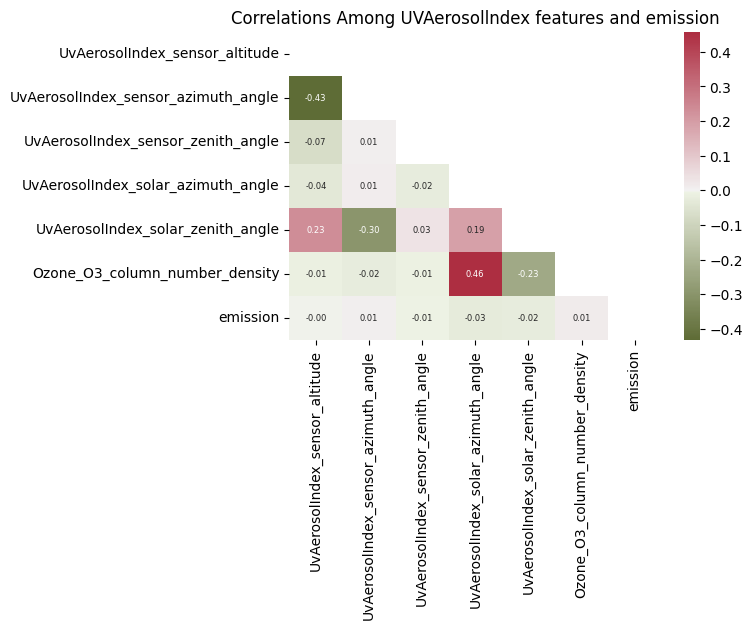

In [57]:
corr_uva= df[['UvAerosolIndex_sensor_altitude', 'UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle',
    'UvAerosolIndex_solar_azimuth_angle','UvAerosolIndex_solar_zenith_angle', 
    'Ozone_O3_column_number_density','emission']].corr()
data_mask=np.triu(np.ones_like(corr_uva, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_uva, annot = True, annot_kws={'size':6}, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among UVAerosollndex features and emission')
plt.show()

There is no correlation bewteen UvAerosolIndex features and emission

### Finding the correlation among the Ozone features and Emission

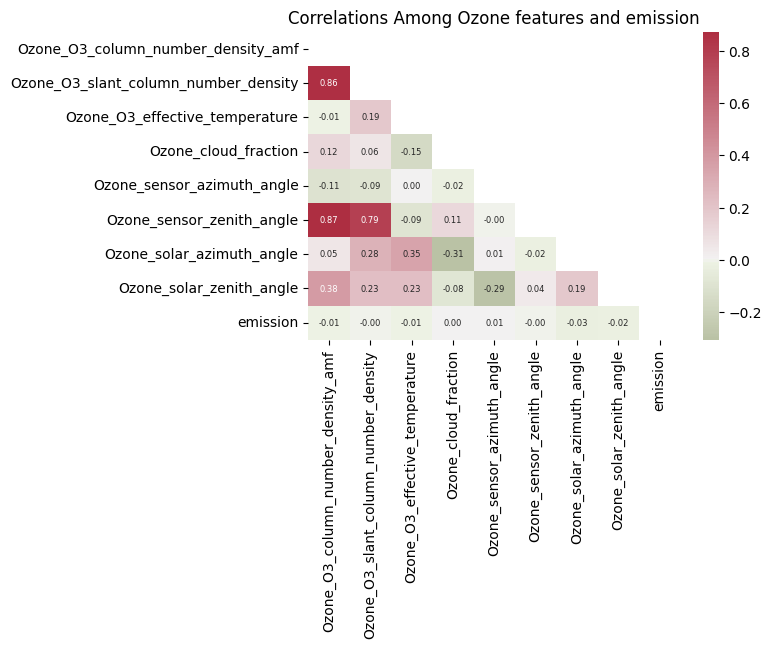

In [58]:
corr_ozone = df[['Ozone_O3_column_number_density_amf',
       'Ozone_O3_slant_column_number_density',
       'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction',
       'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle','emission']].corr()
data_mask=np.triu(np.ones_like(corr_ozone, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_ozone, annot = True, annot_kws={'size':6}, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among Ozone features and emission')
plt.show()

There is no correlation bewteen Ozone features and emission

### Finding the correlation among the Cloud features and Emission

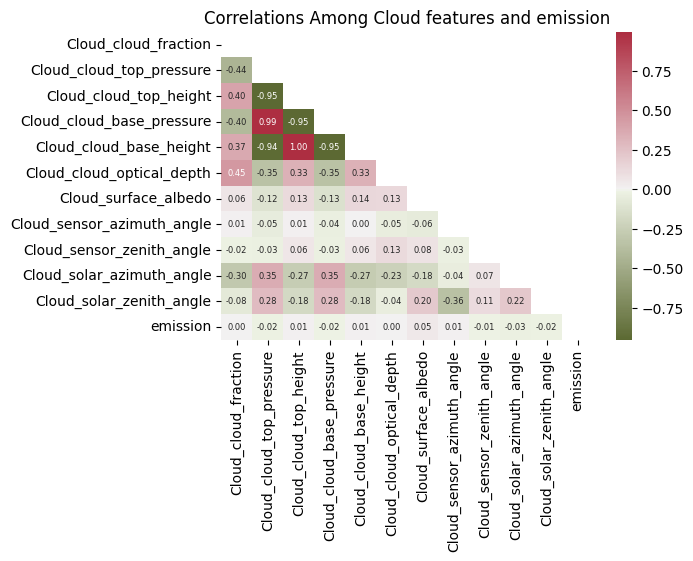

In [59]:
corr_cloud = df[['Cloud_cloud_fraction',
       'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
       'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
       'Cloud_cloud_optical_depth', 'Cloud_surface_albedo',
       'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle',
       'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle', 'emission']].corr()
data_mask=np.triu(np.ones_like(corr_cloud, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
plt.figure(figsize=(6,4))
sns.heatmap(corr_cloud, annot = True, annot_kws={'size':6}, cmap = cmap, fmt = '.2f', center = 0, mask = data_mask)
plt.title('Correlations Among Cloud features and emission')
plt.show()

There is no correlation bewteen Cloud features and emission

In [60]:
null = pd.DataFrame({"Percentage": df.isna().sum()/df.shape[0]*100}).sort_values("Percentage", ascending=False)
null = null.reset_index().rename(columns= {"index": 'Name'})
null

Name  Percentage
0   NitrogenDioxide_stratospheric_NO2_column_numbe...   21.516353
1                      NitrogenDioxide_cloud_fraction   21.516353
2                 NitrogenDioxide_tropopause_pressure   21.516353
3     NitrogenDioxide_NO2_slant_column_number_density   21.516353
4                     NitrogenDioxide_sensor_altitude   21.516353
5   NitrogenDioxide_tropospheric_NO2_column_number...   21.516353
6           NitrogenDioxide_NO2_column_number_density   21.516353
7                NitrogenDioxide_sensor_azimuth_angle   21.516353
8                 NitrogenDioxide_sensor_zenith_angle   21.516353
9                 NitrogenDioxide_solar_azimuth_angle   21.516353
10                 NitrogenDioxide_solar_zenith_angle   21.516353
11            NitrogenDioxide_absorbing_aerosol_index   21.516353
12                  SulphurDioxide_solar_zenith_angle   16.821640
13      SulphurDioxide_SO2_column_number_density_15km   16.821640
14                 SulphurDioxide_solar_azimuth_angle   16.821640
15                 SulphurDioxide_sensor_zenith_angle   16.821640
16                SulphurDioxide_sensor_azimuth_angle   16.821640
17                      SulphurDioxide_cloud_fraction   16.821640
18     SulphurDioxide_SO2_slant_column_number_density   16.821640
19       SulphurDioxide_SO2_column_number_density_amf   16.821640
20           SulphurDioxide_SO2_column_number_density   16.821640
21                        Formaldehyde_cloud_fraction    7.570063
22      Formaldehyde_HCHO_slant_column_number_density    7.570063
23  Formaldehyde_tropospheric_HCHO_column_number_d...    7.570063
24                   Formaldehyde_solar_azimuth_angle    7.570063
25                   Formaldehyde_sensor_zenith_angle    7.570063
26                  Formaldehyde_sensor_azimuth_angle    7.570063
27                    Formaldehyde_solar_zenith_angle    7.570063
28  Formaldehyde_tropospheric_HCHO_column_number_d...    7.570063
29                 Ozone_O3_column_number_density_amf    0.000000
30                          Cloud_sensor_zenith_angle    0.000000
31                     Ozone_O3_effective_temperature    0.000000
32                               Ozone_cloud_fraction    0.000000
33                         Ozone_sensor_azimuth_angle    0.000000
34                          Ozone_sensor_zenith_angle    0.000000
35                          Ozone_solar_azimuth_angle    0.000000
36                           Cloud_solar_zenith_angle    0.000000
37                          Cloud_solar_azimuth_angle    0.000000
38                         Cloud_sensor_azimuth_angle    0.000000
39                               Cloud_cloud_fraction    0.000000
40                               Cloud_surface_albedo    0.000000
41                          Cloud_cloud_optical_depth    0.000000
42                            Cloud_cloud_base_height    0.000000
43                           Ozone_solar_zenith_angle    0.000000
44                          Cloud_cloud_base_pressure    0.000000
45                             Cloud_cloud_top_height    0.000000
46                           Cloud_cloud_top_pressure    0.000000
47               Ozone_O3_slant_column_number_density    0.000000
48                               ID_LAT_LON_YEAR_WEEK    0.000000
49                     Ozone_O3_column_number_density    0.000000
50                  UvAerosolIndex_solar_zenith_angle    0.000000
51                                          longitude    0.000000
52                                               year    0.000000
53                                            week_no    0.000000
54            CarbonMonoxide_CO_column_number_density    0.000000
55           CarbonMonoxide_H2O_column_number_density    0.000000
56                        CarbonMonoxide_cloud_height    0.000000
57                     CarbonMonoxide_sensor_altitude    0.000000
58                CarbonMonoxide_sensor_azimuth_angle    0.000000
59                 CarbonMonoxide_sensor_zenith_angle    0.000000
60                 Carb

Fillin the null values by median

In [61]:
import pandas as pd

def fill_nan_with_median(df):
    # Calculate the median of numeric columns only
    numeric_medians = df.select_dtypes(include="number").median()
    
    # Fill NaN values in numeric columns with their respective medians
    df_filled = df.fillna(numeric_medians)
    
    return df_filled

# Example usage:
# df = pd.DataFrame({...})  # Replace with your dataframe


In [62]:
df_new = fill_nan_with_median(df)

In [63]:
#Checking for the null values
df_new.isna().sum().sum()

0

Plotting the Histograms of the features

In [64]:
#Numerical columns are:
numerical_columns = df_new.select_dtypes(include=['int', 'float']).keys()

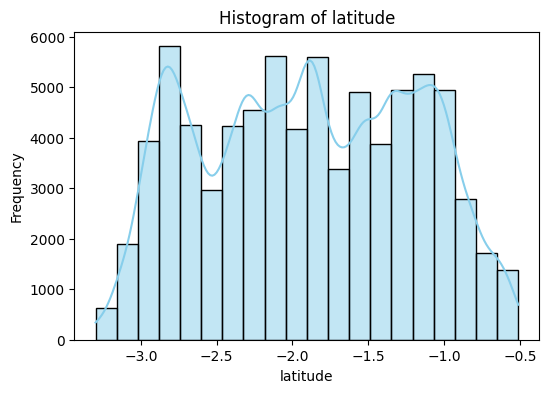

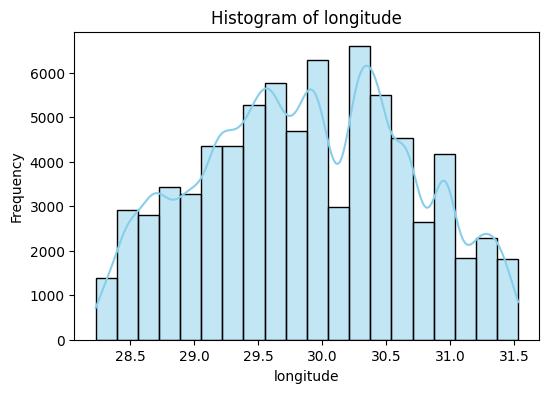

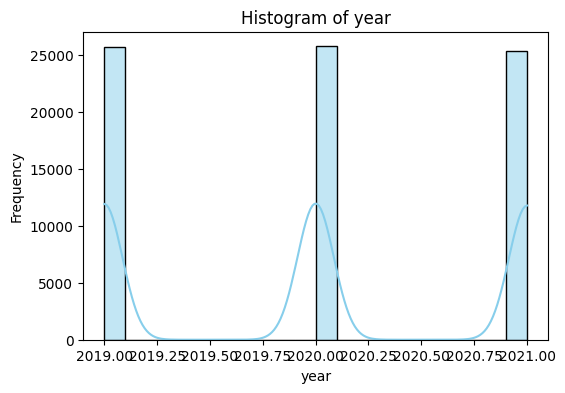

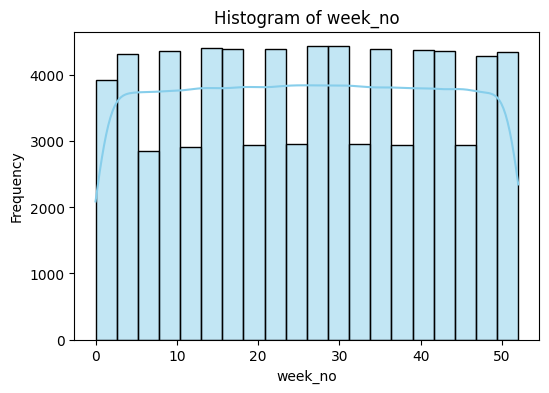

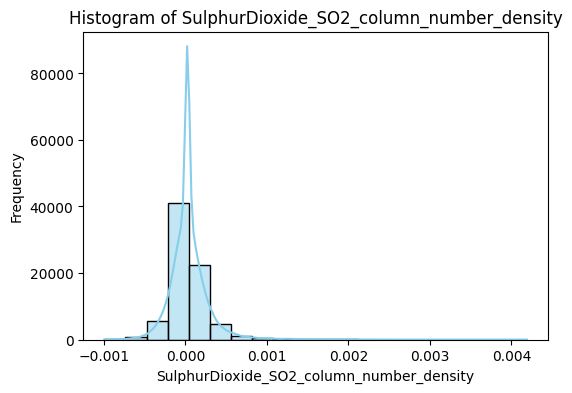

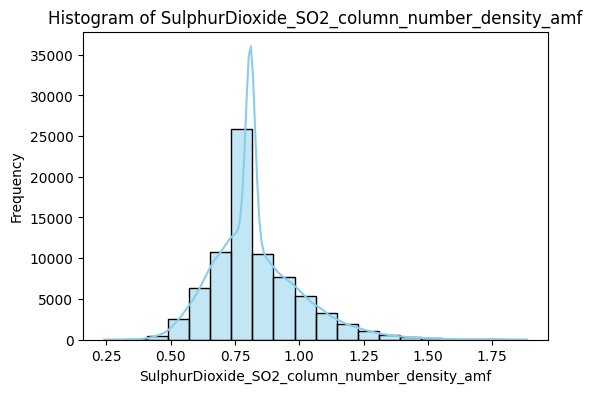

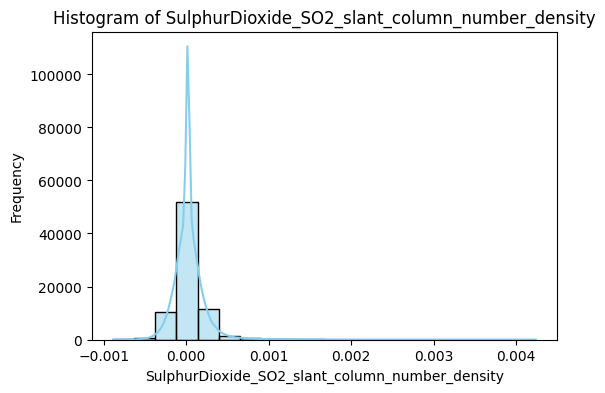

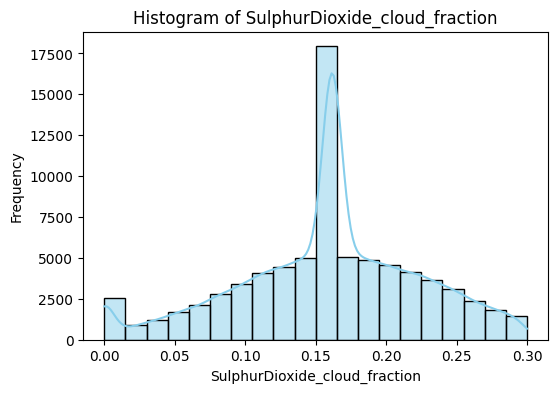

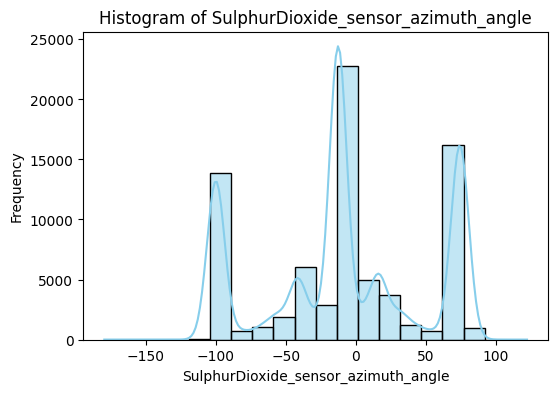

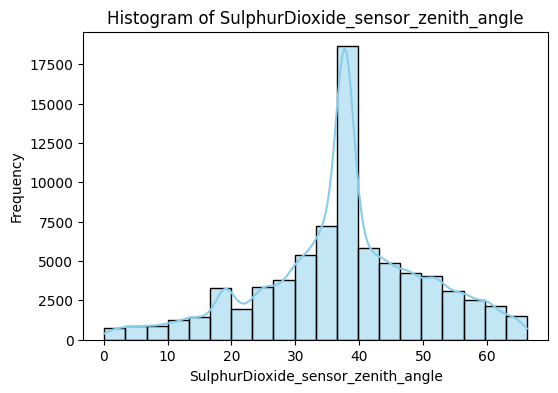

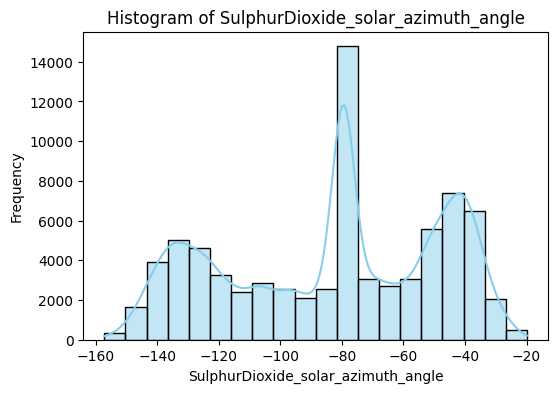

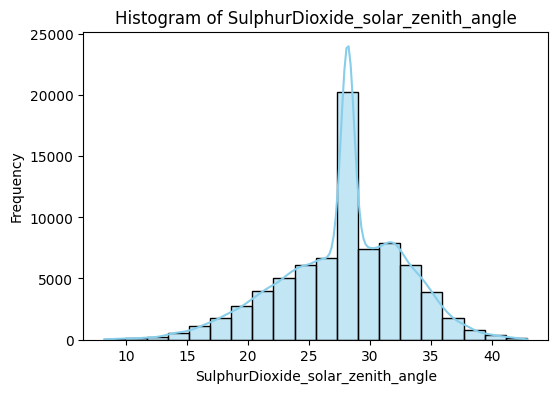

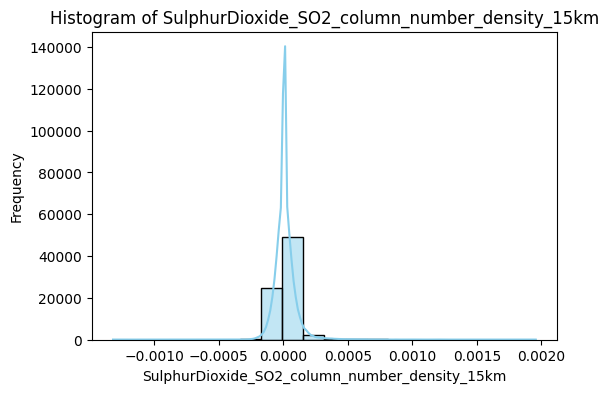

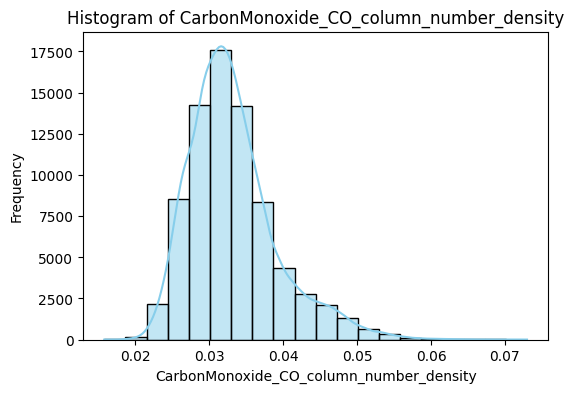

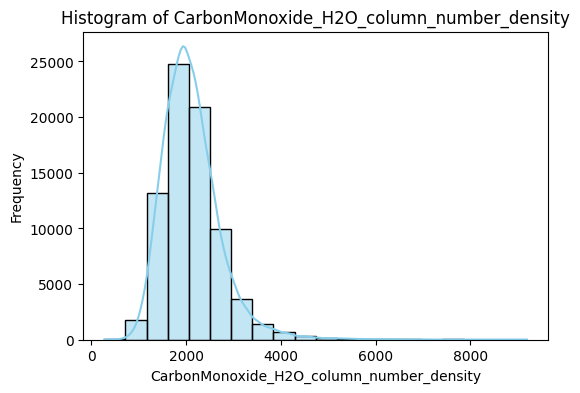

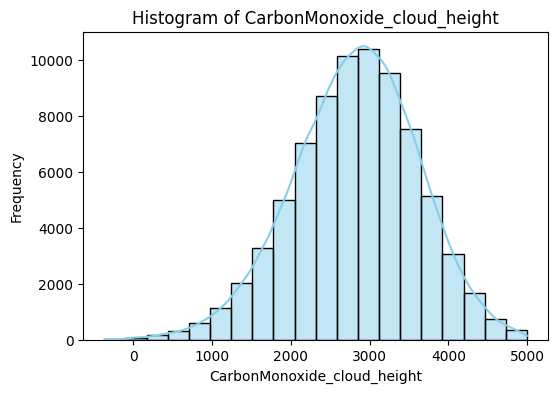

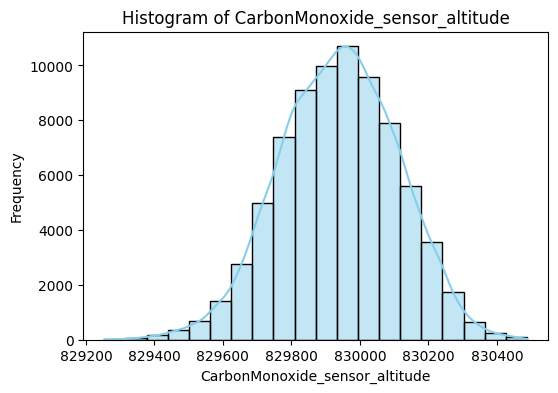

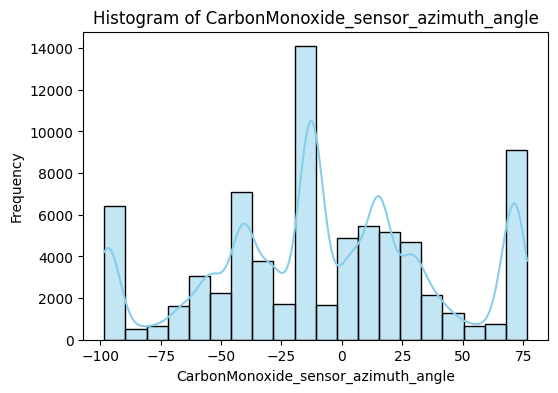

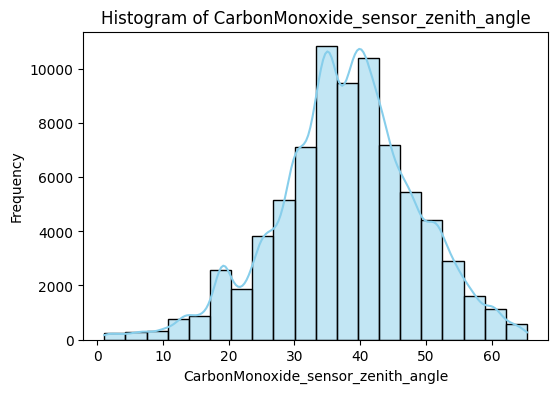

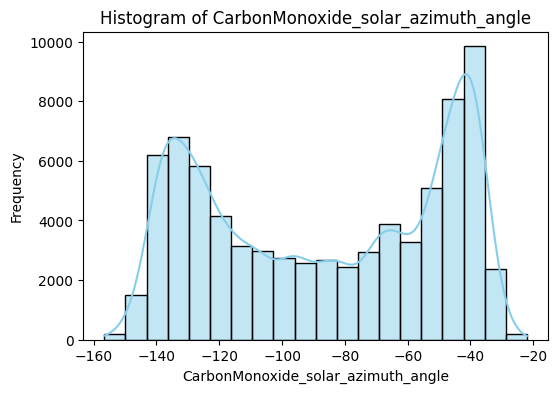

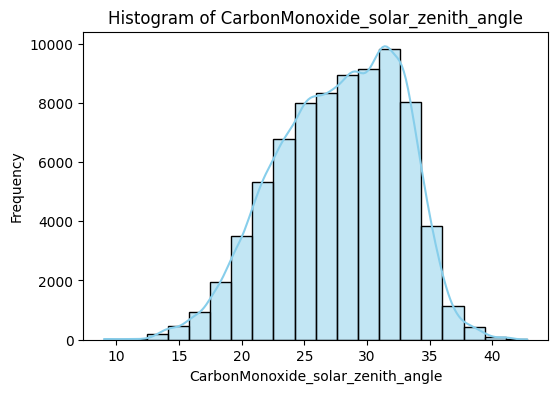

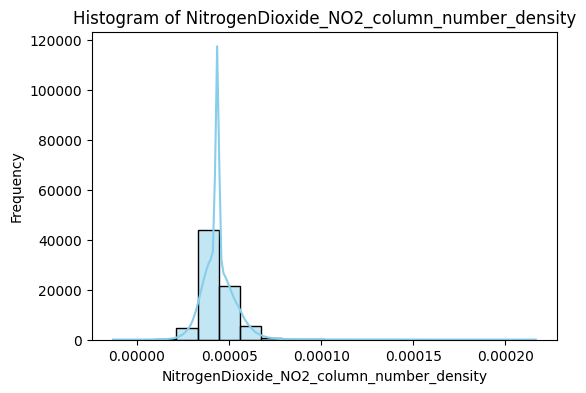

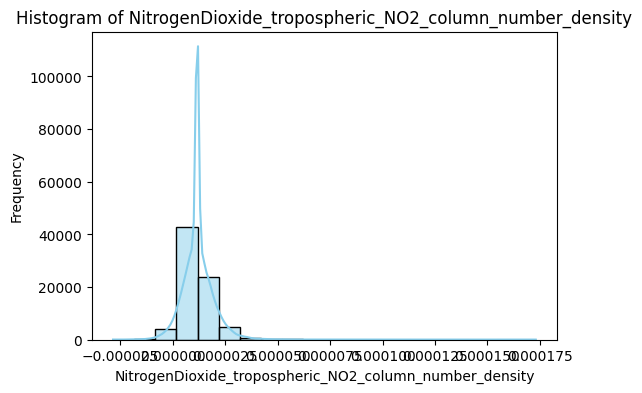

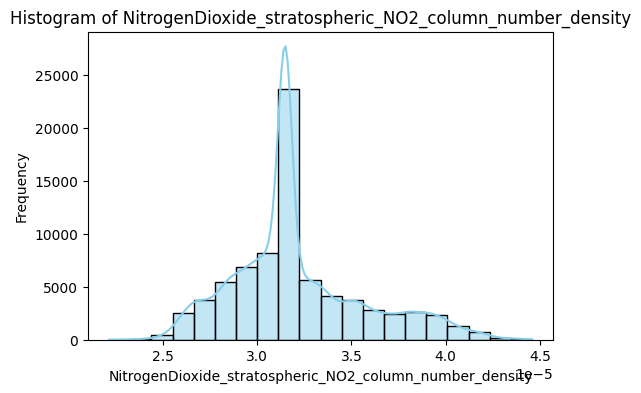

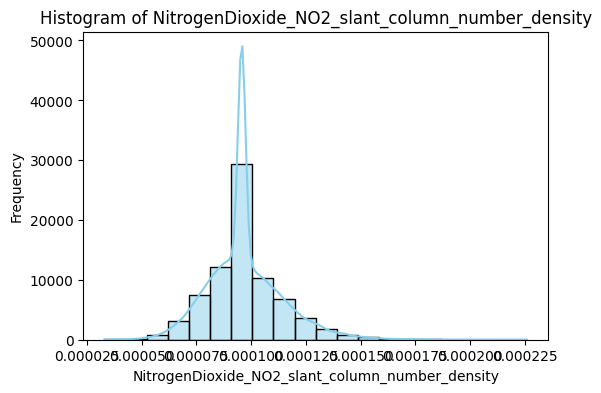

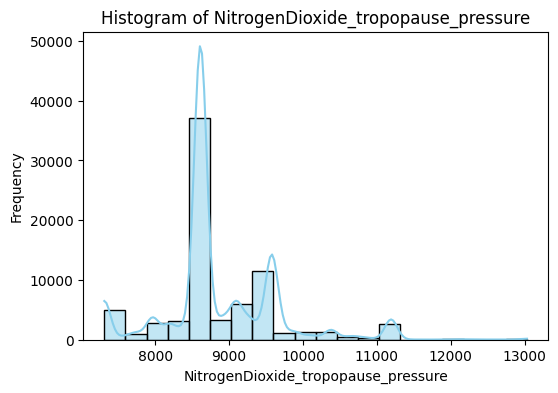

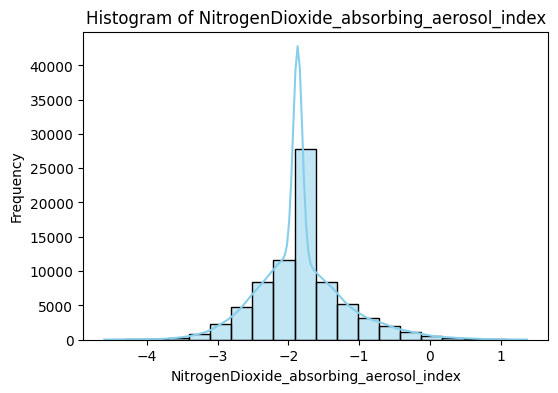

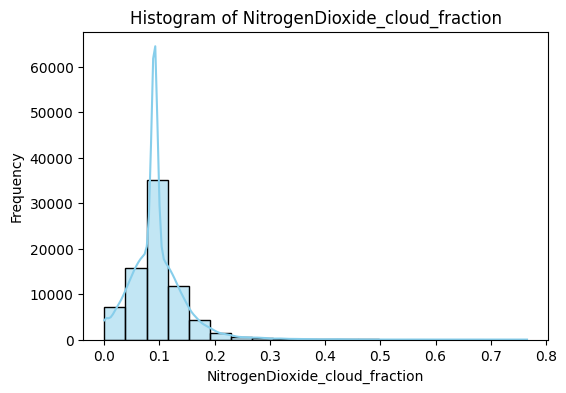

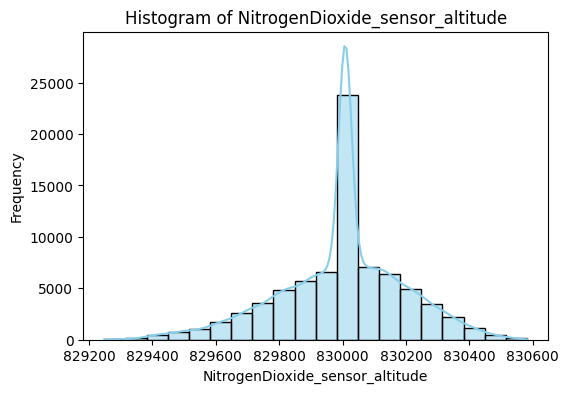

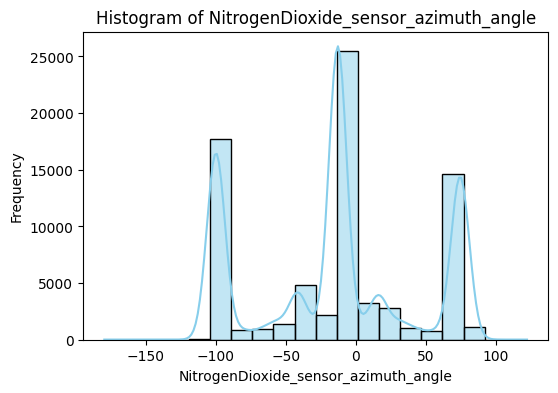

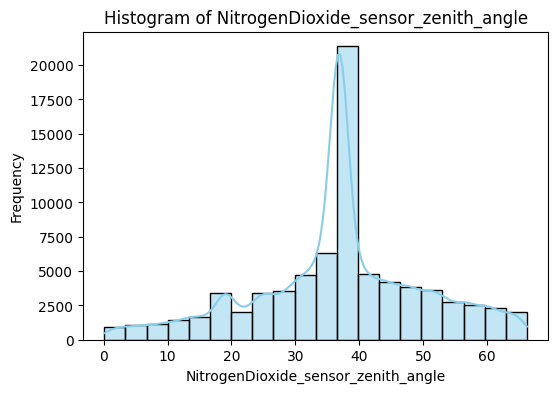

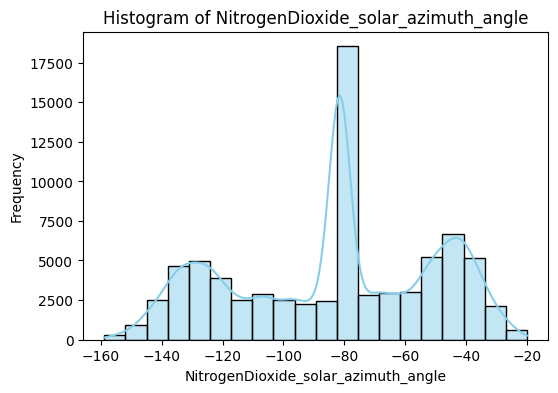

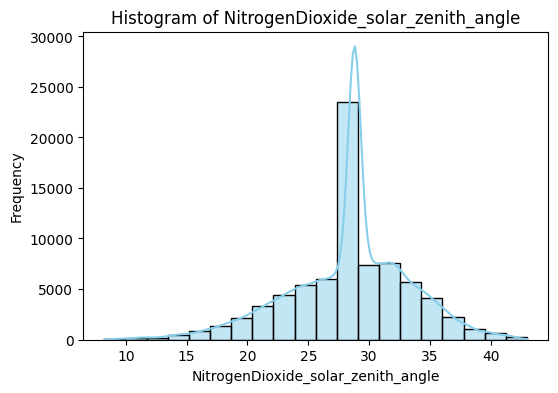

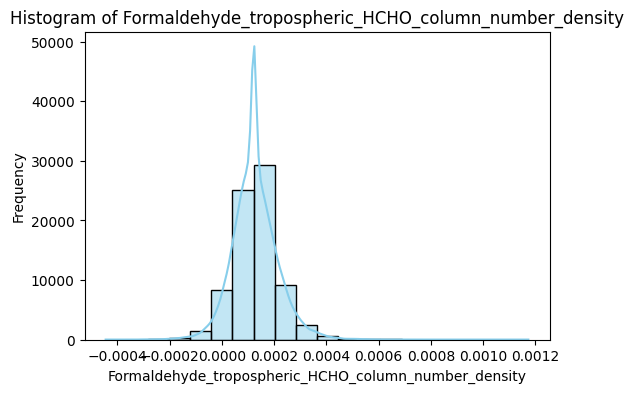

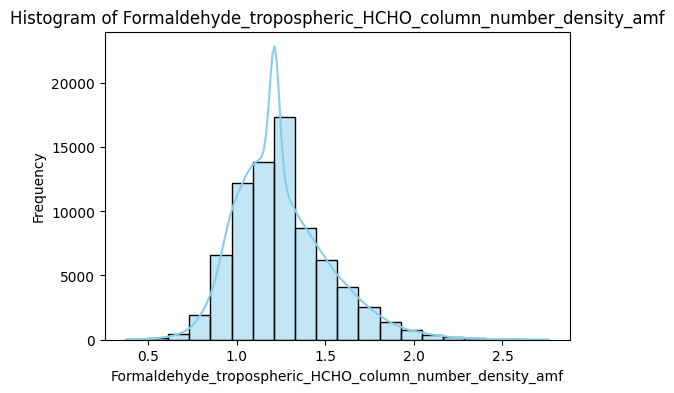

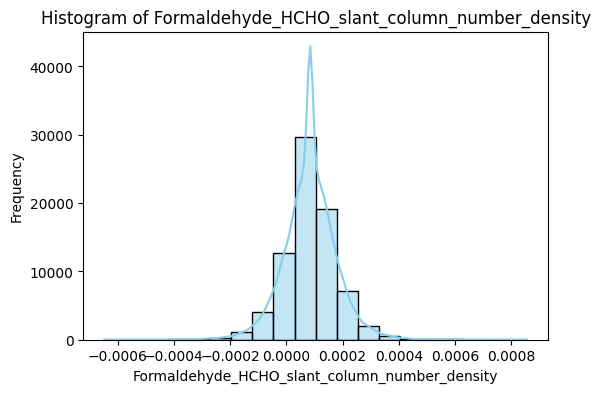

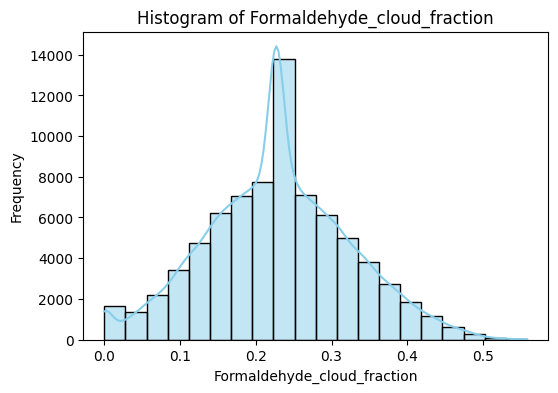

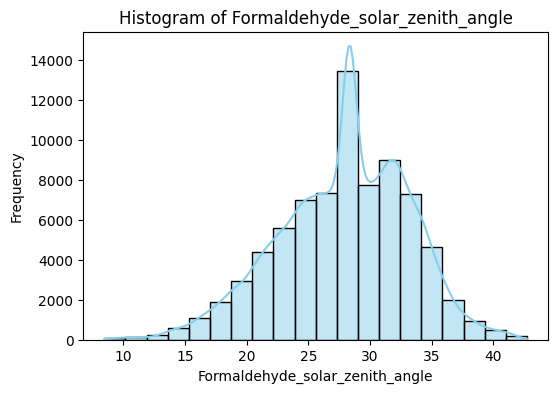

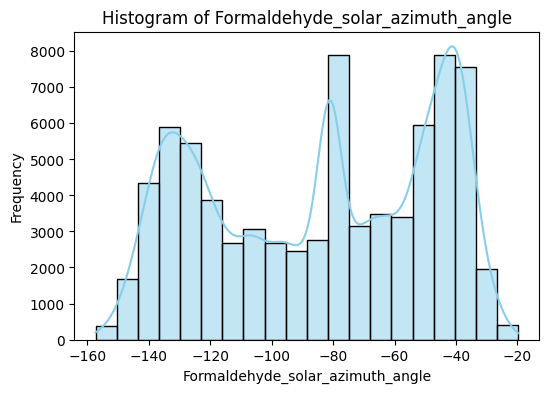

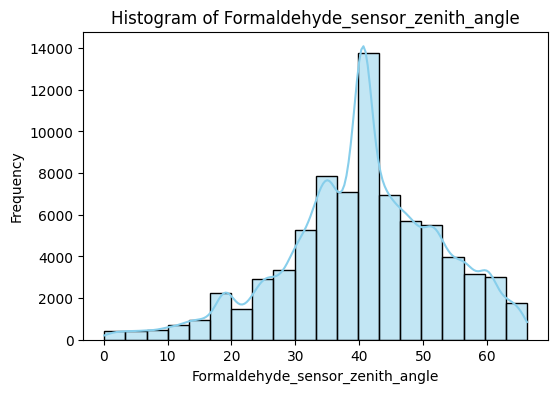

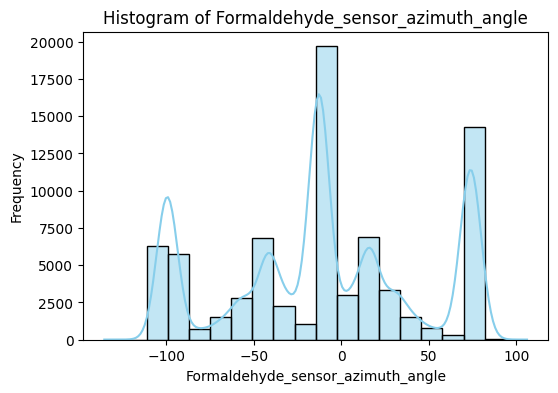

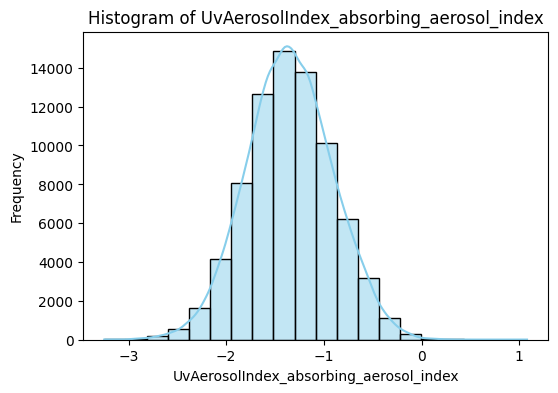

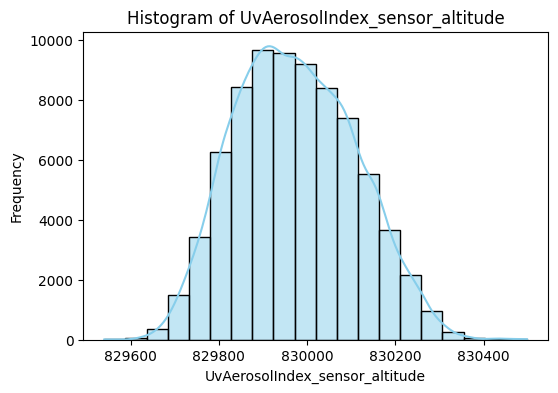

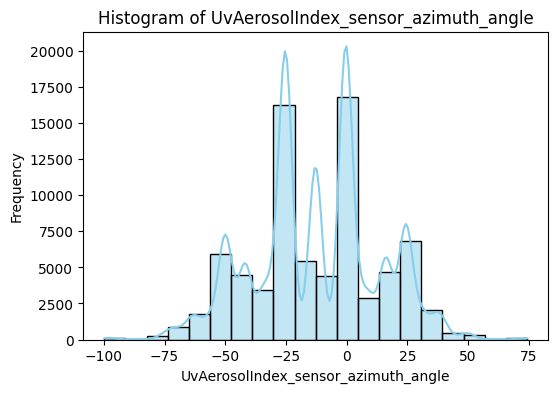

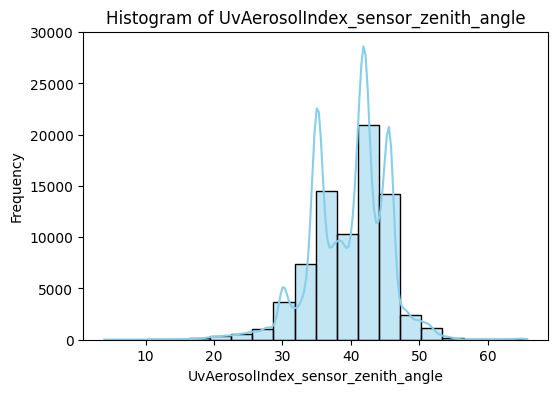

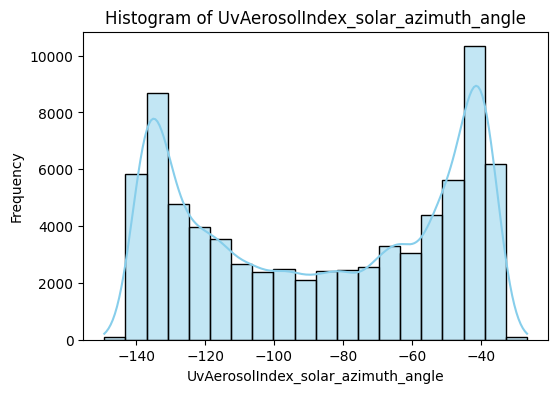

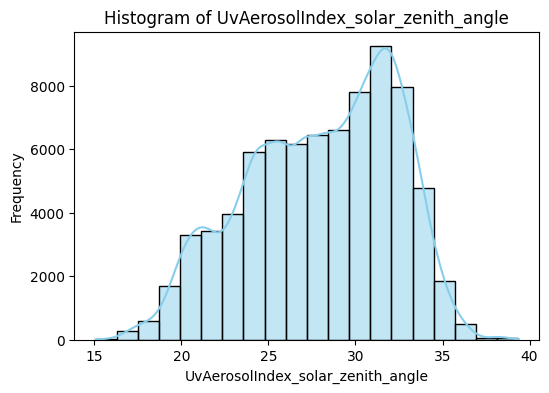

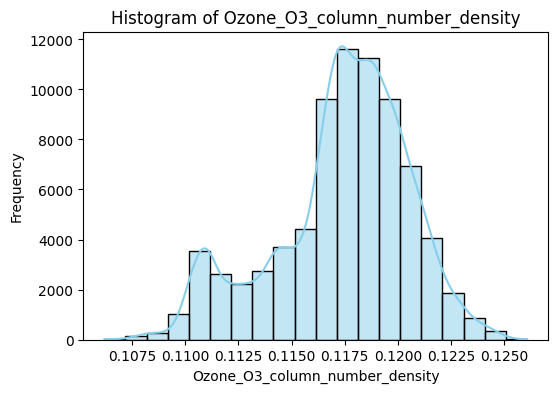

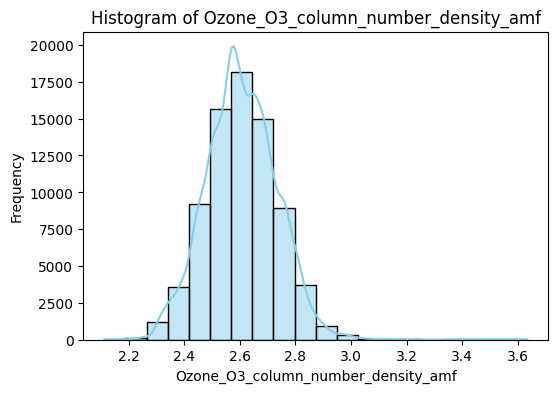

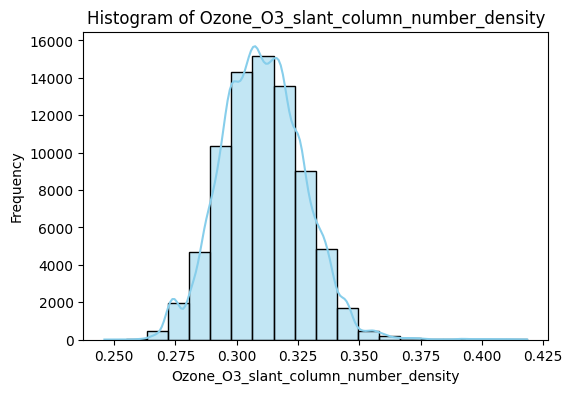

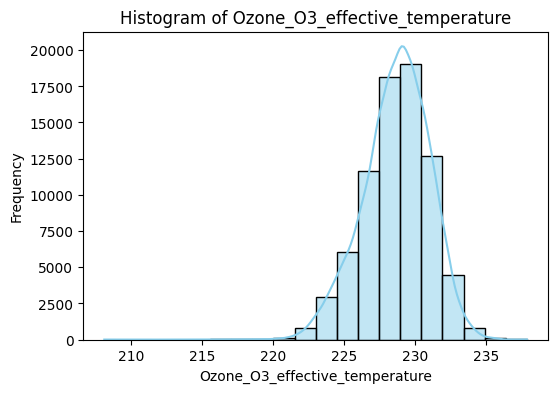

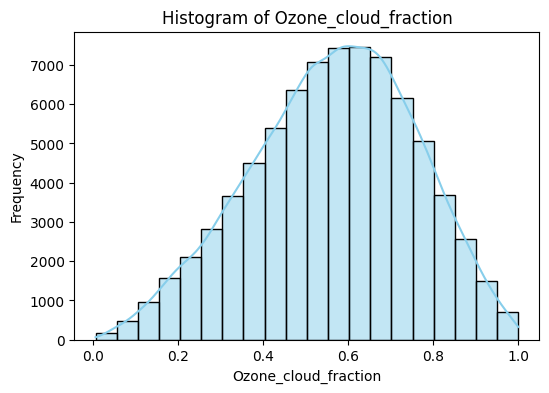

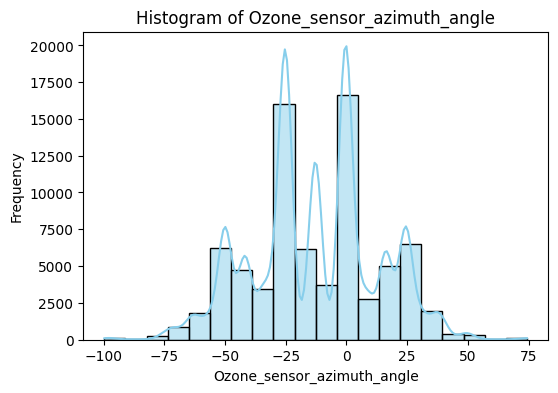

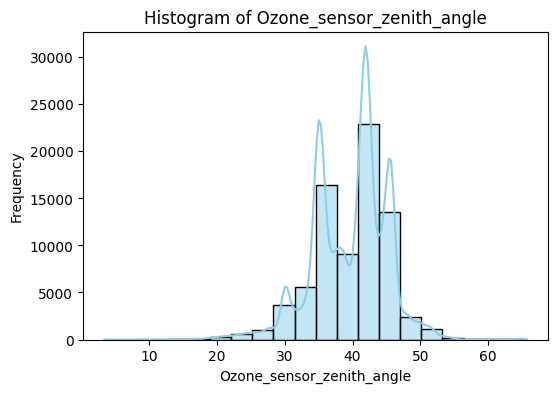

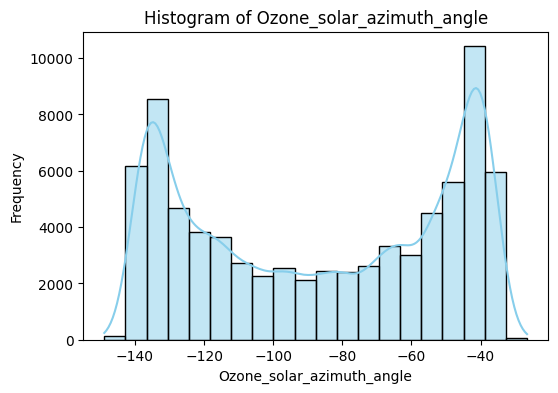

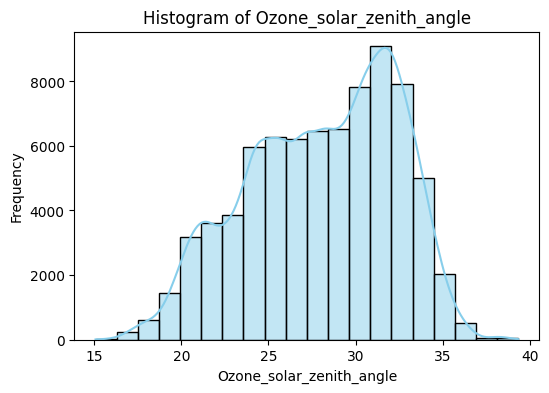

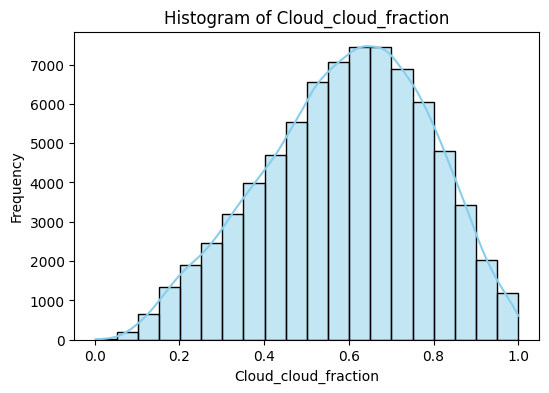

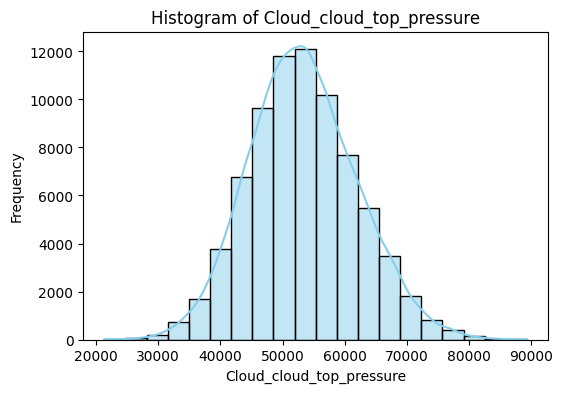

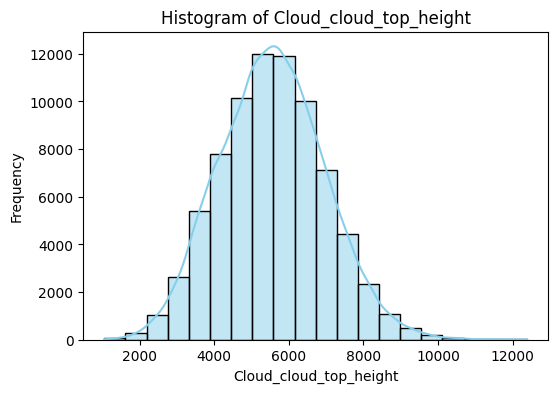

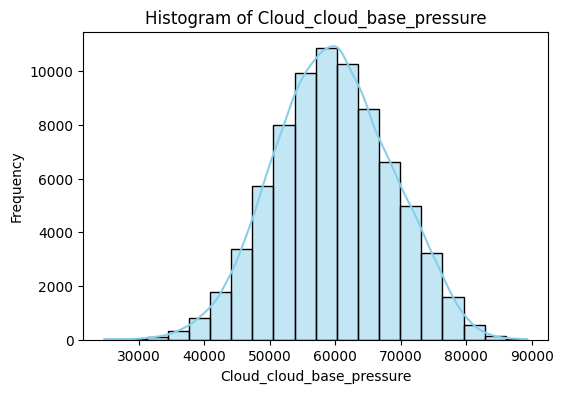

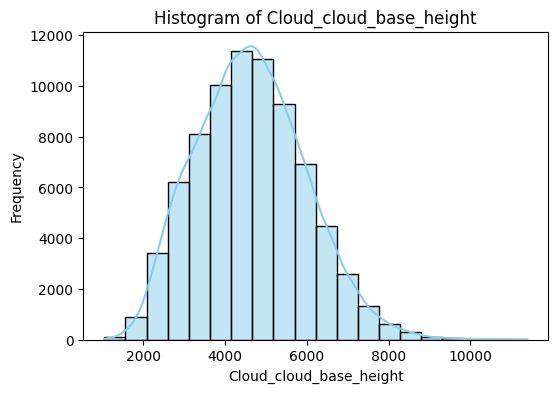

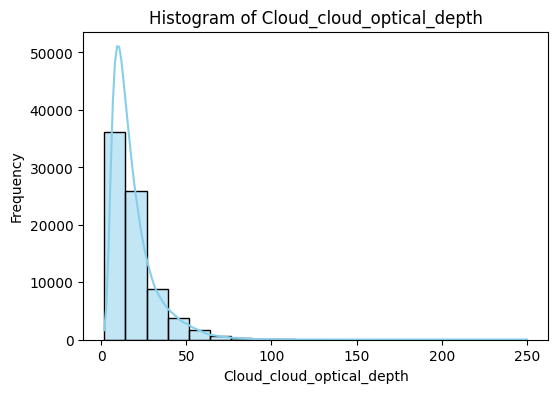

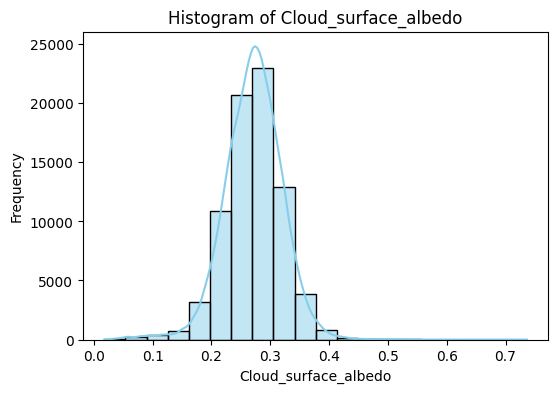

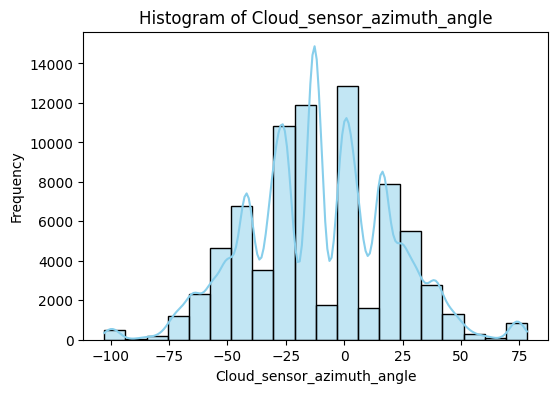

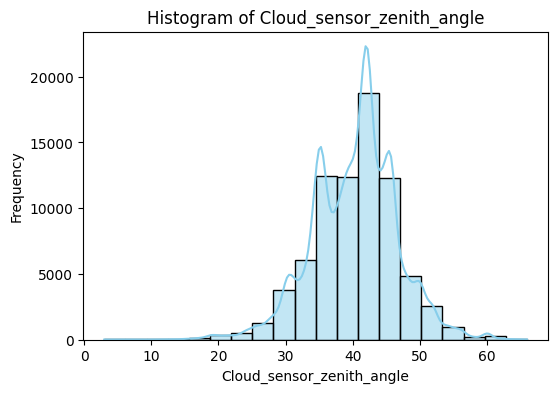

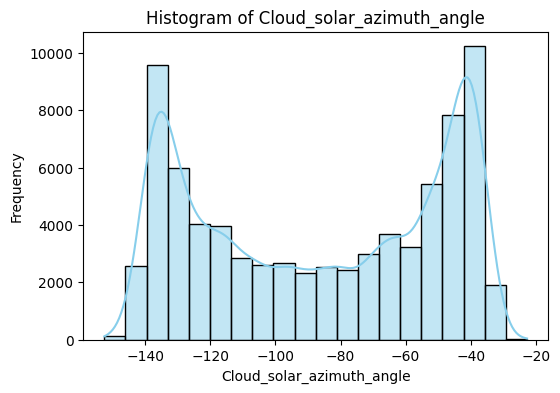

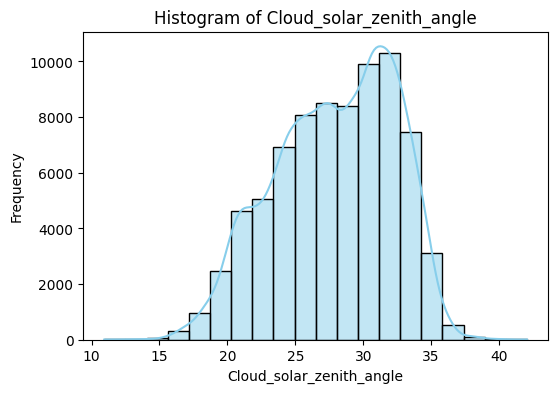

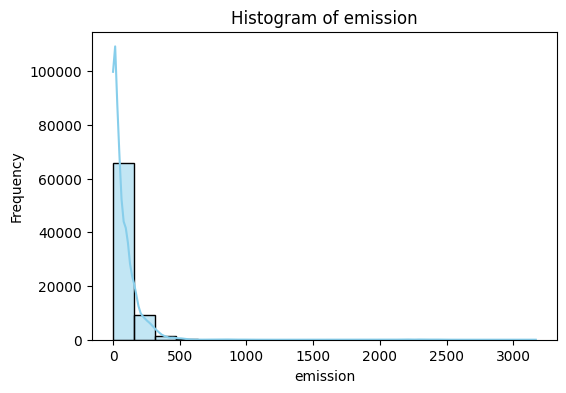

In [65]:
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_new[column], bins=20, kde=True, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

From the histplot it is observed that some of the features have most the the values near to 0 or 0.  
So we can drop that features. Following are the features or columns:   
1) SulphurDioxide_SO2_column_number_density   
2) SulphurDioxide_SO2_slant_column_number_density    
3) NitrogenDioxide_NO2_column_number_density  
4) Formaldehyde_tropospheric_HCHO_column_number_density   
5) SulphurDioxide_SO2_column_number_density_15km   

In [66]:
drop_columns_1 = ['SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_slant_column_number_density',
                  'NitrogenDioxide_NO2_column_number_density','Formaldehyde_tropospheric_HCHO_column_number_density',
                  'SulphurDioxide_SO2_column_number_density_15km']
df_new.drop(columns=drop_columns_1, inplace=True)

In [67]:
numerical_columns = df_new.select_dtypes(include=['int', 'float']).keys()

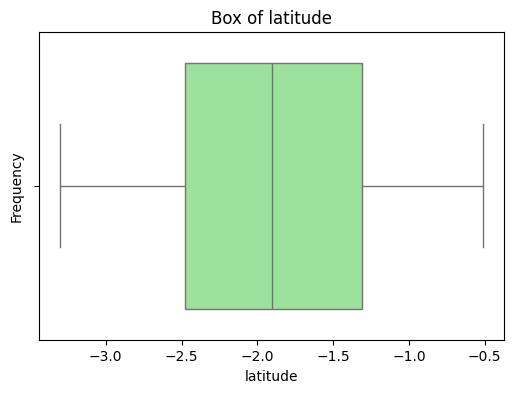

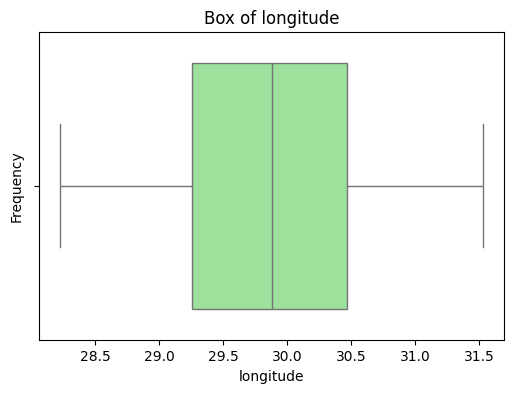

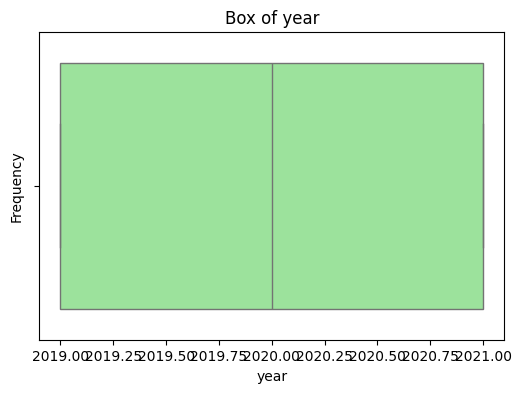

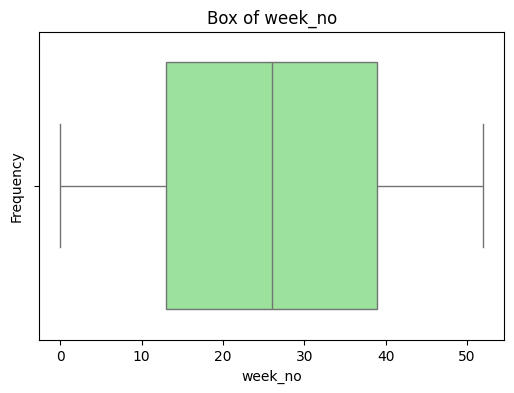

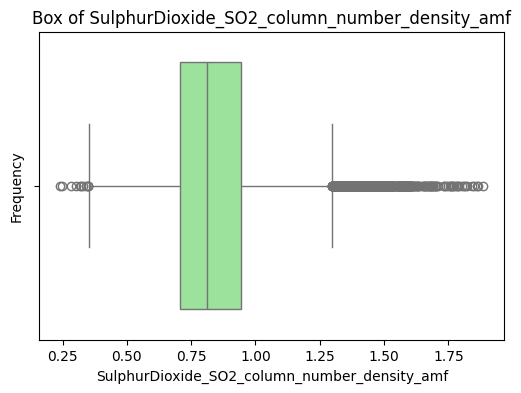

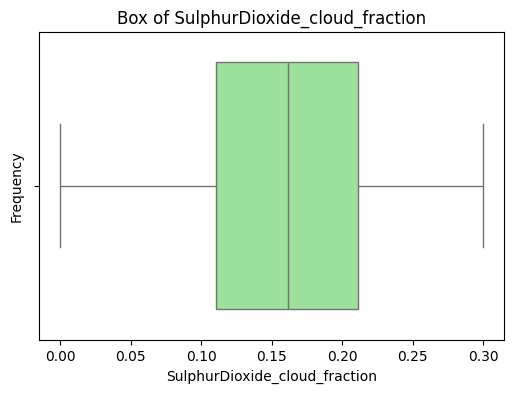

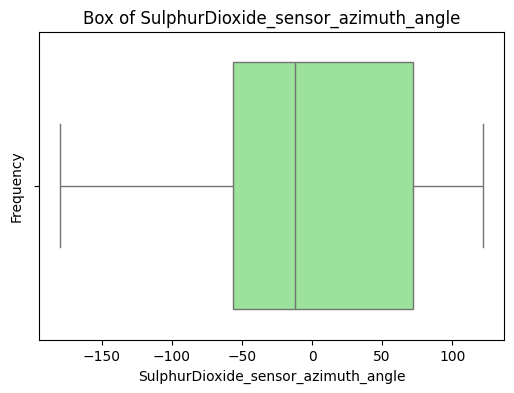

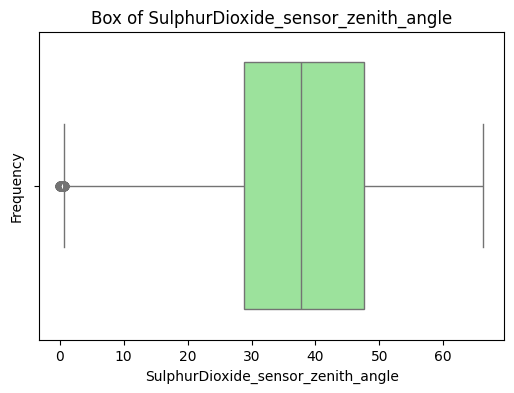

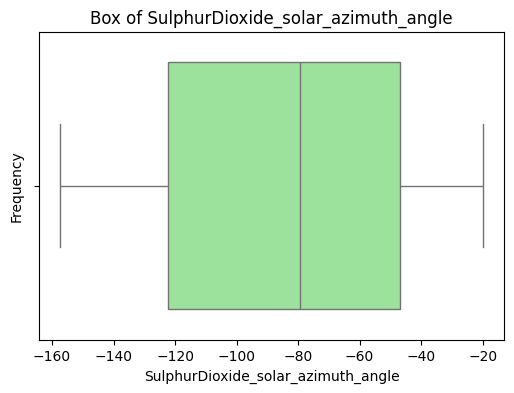

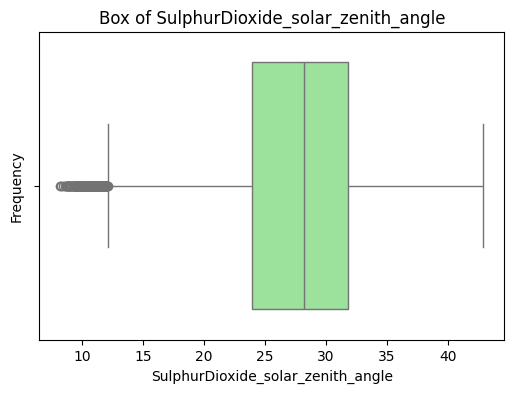

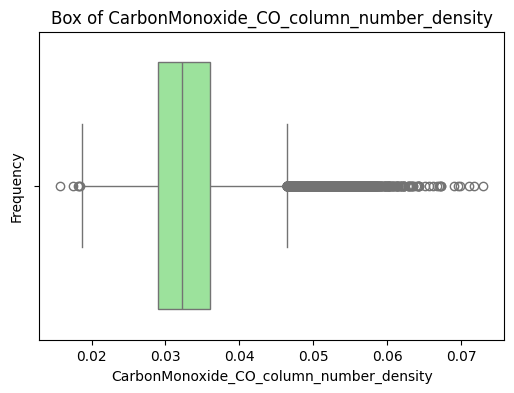

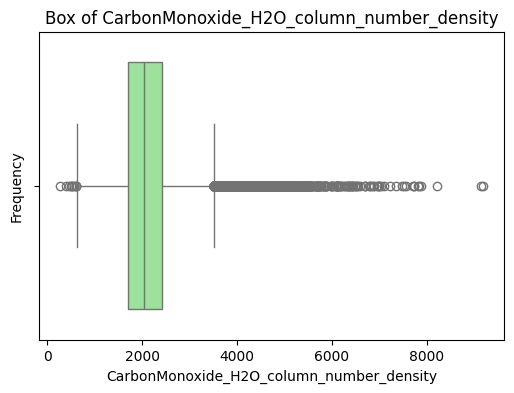

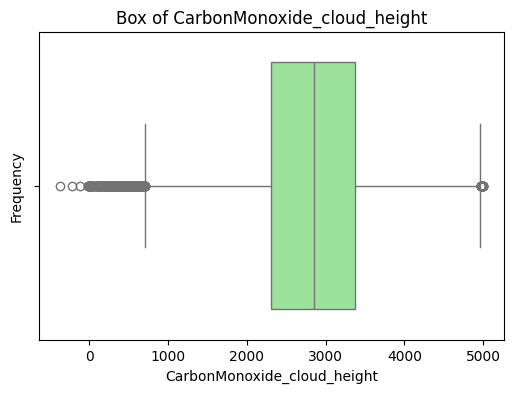

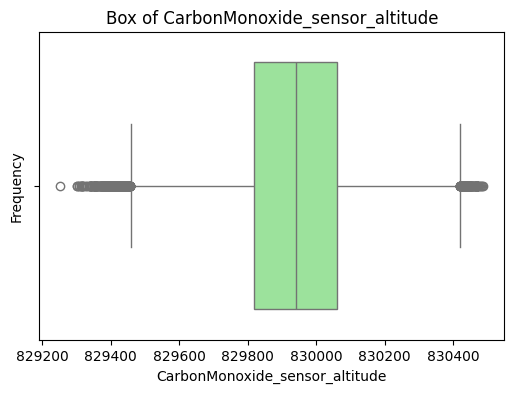

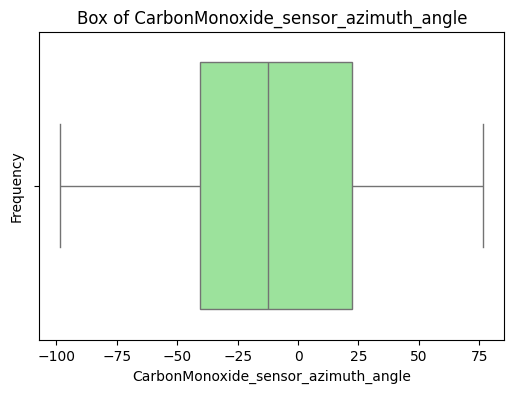

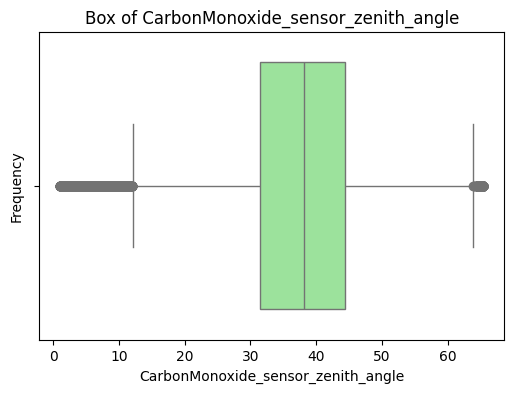

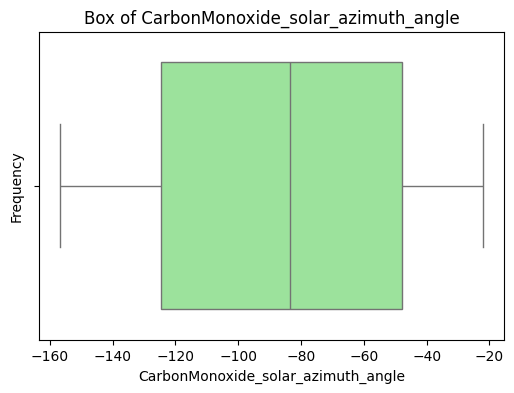

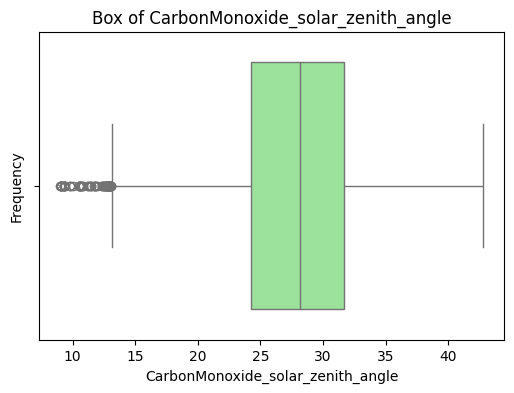

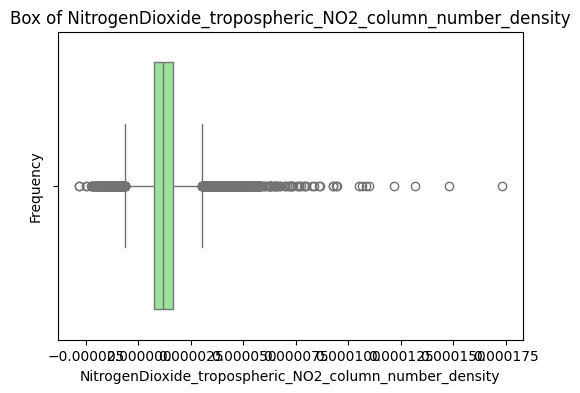

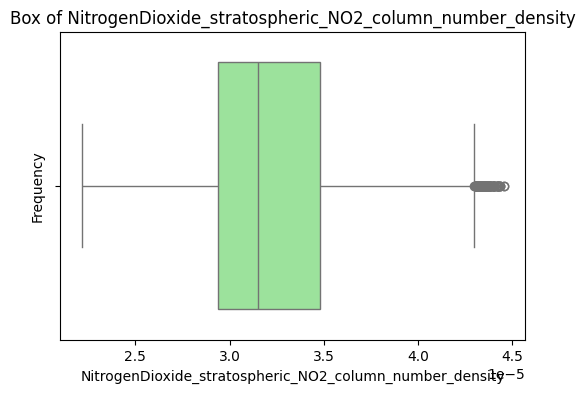

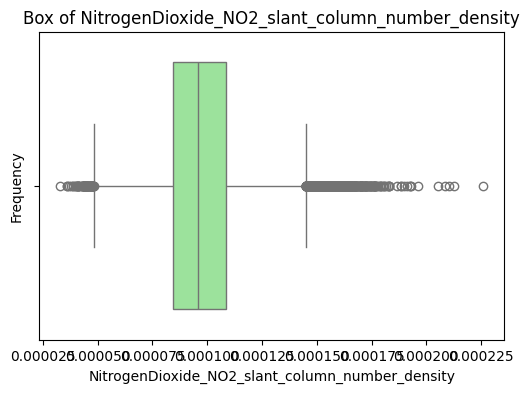

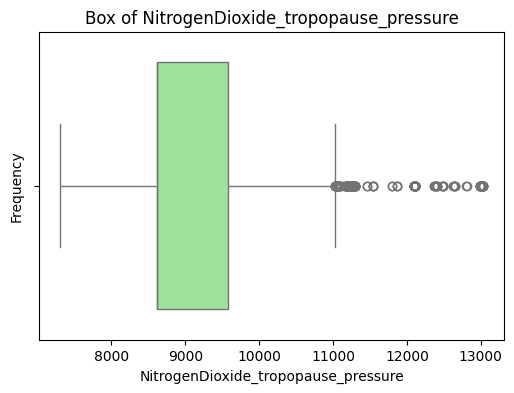

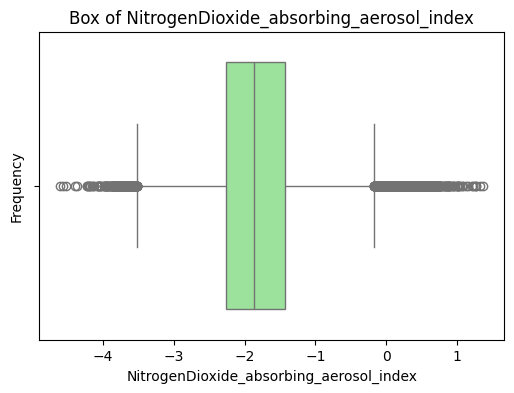

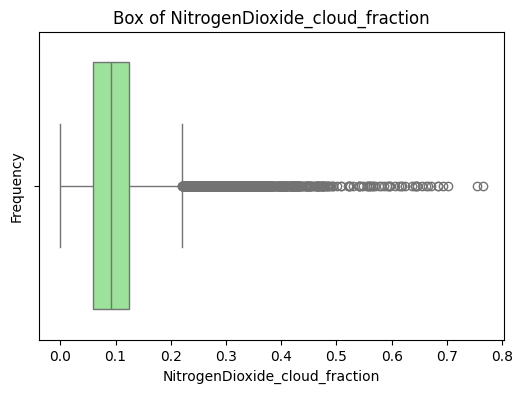

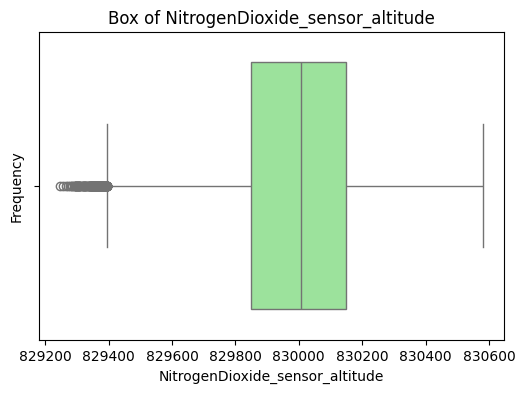

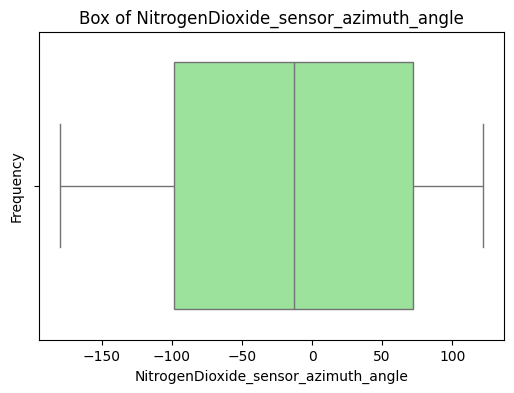

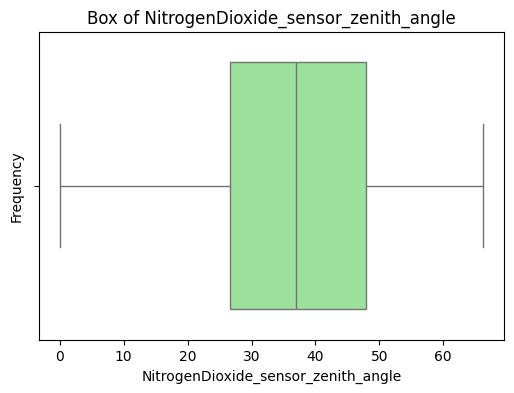

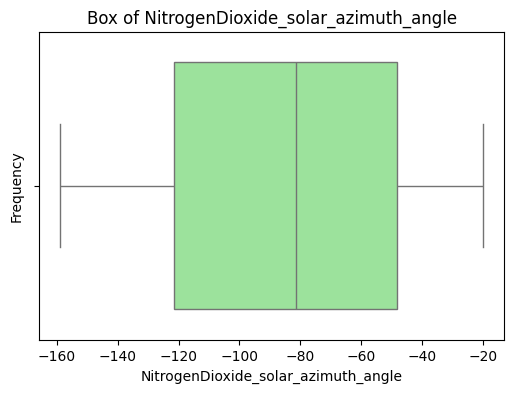

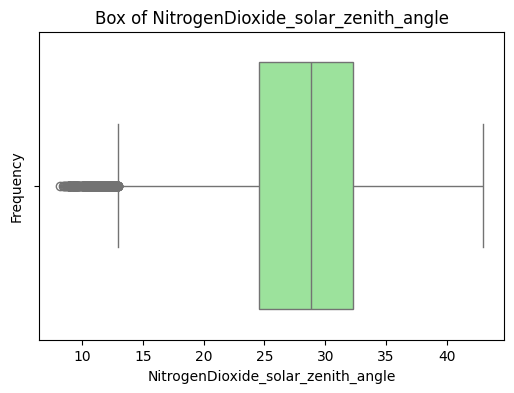

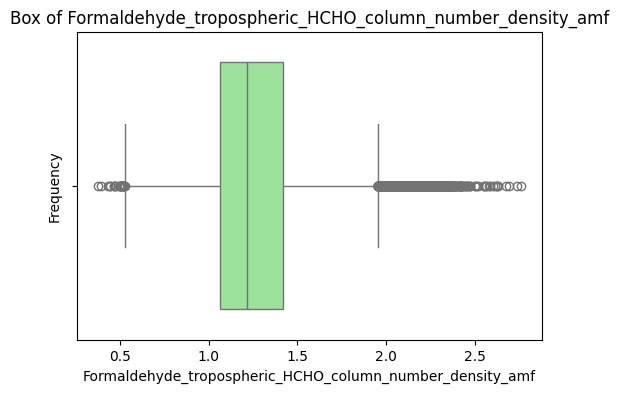

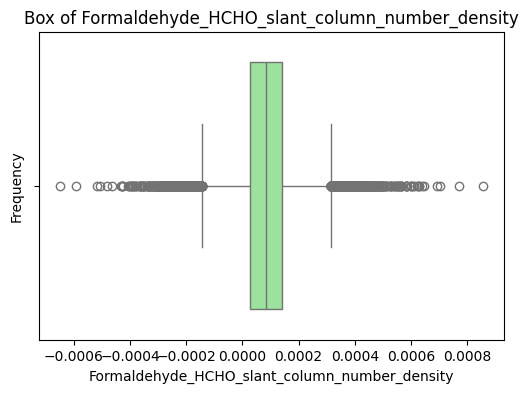

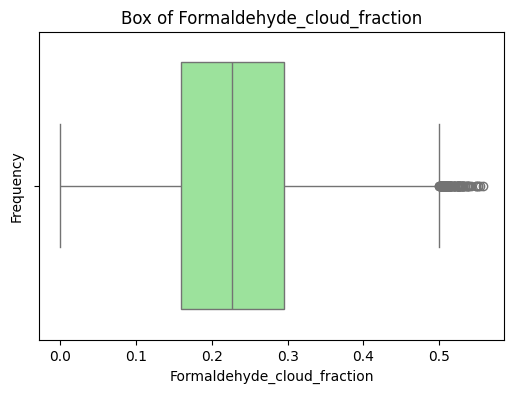

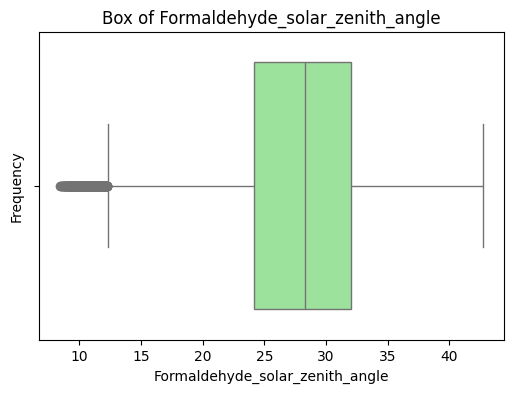

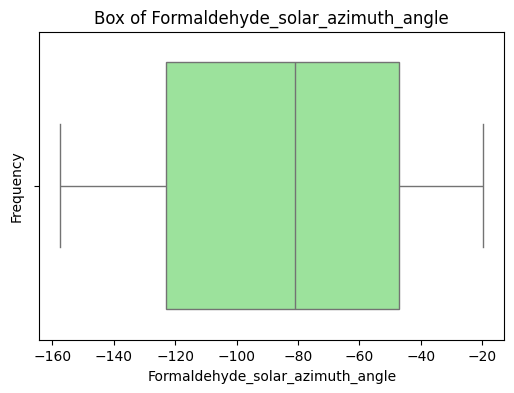

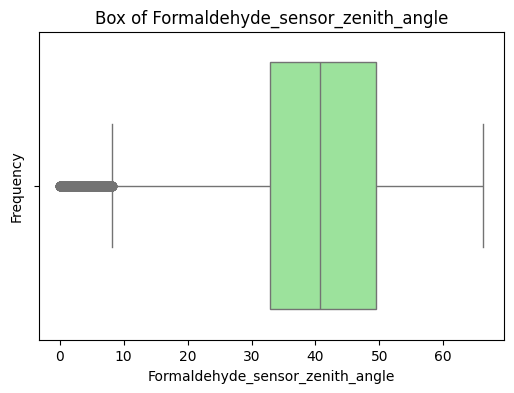

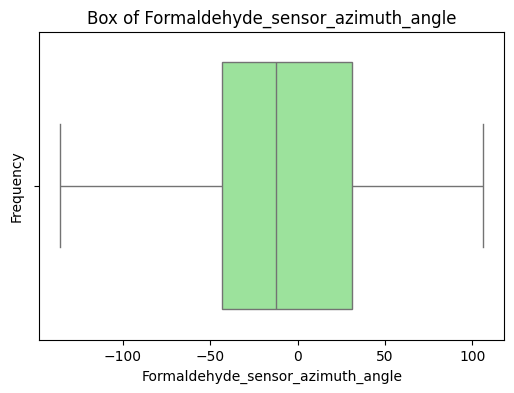

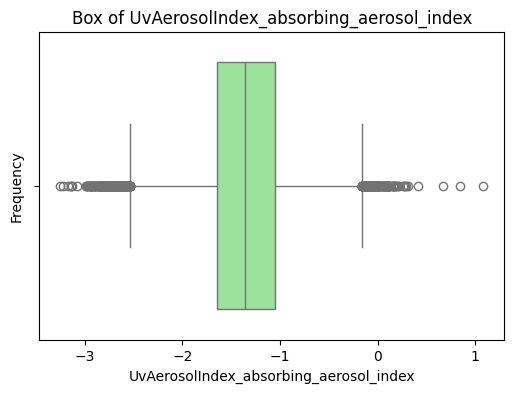

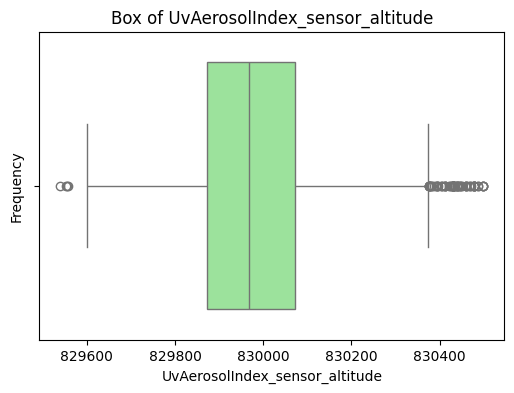

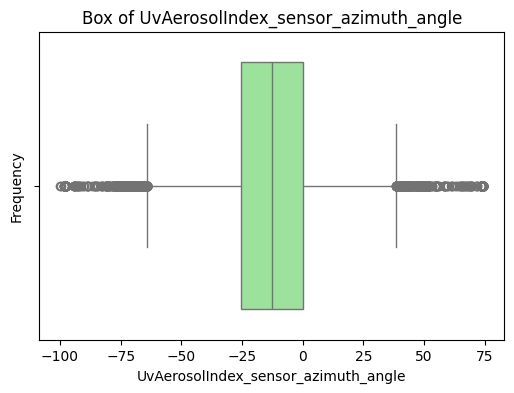

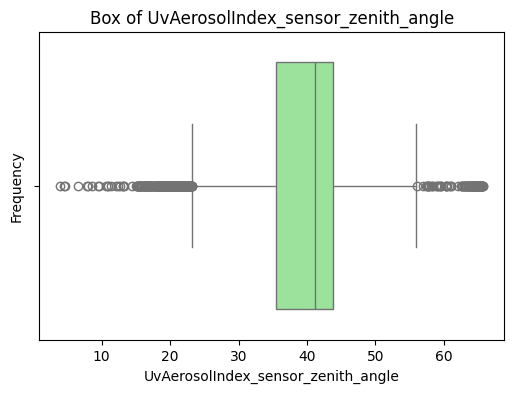

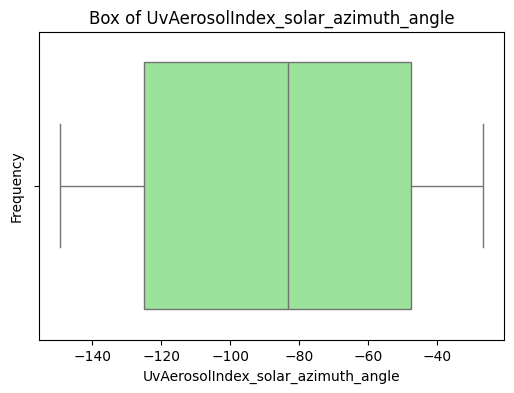

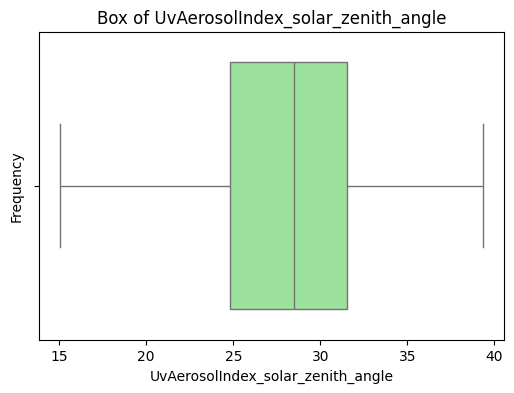

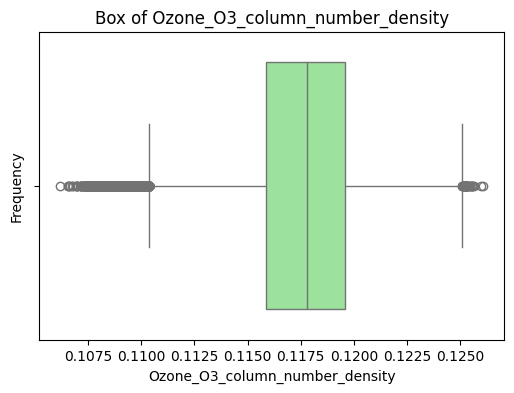

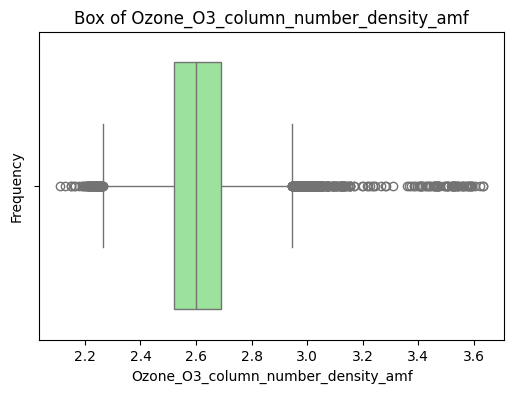

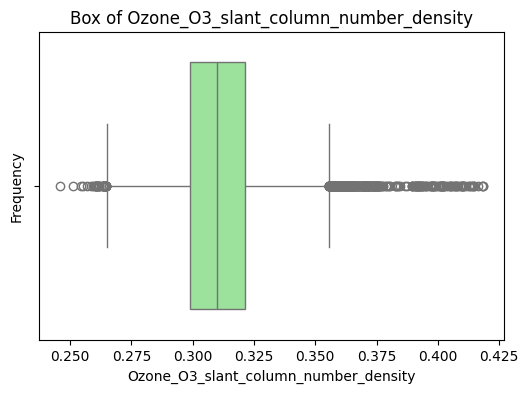

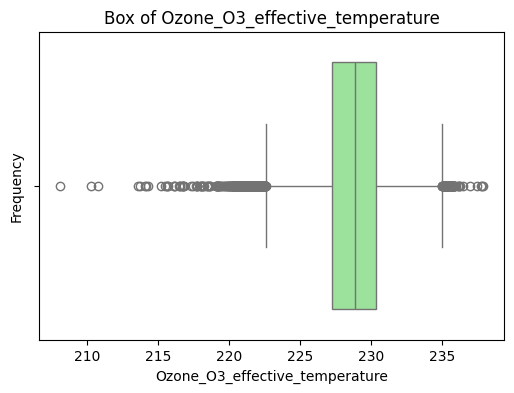

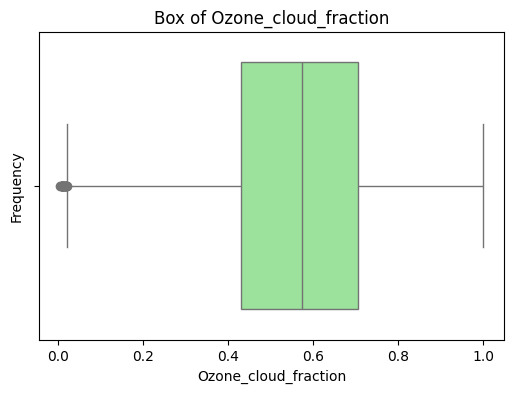

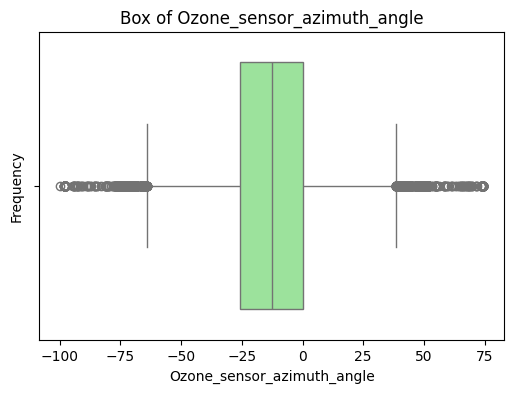

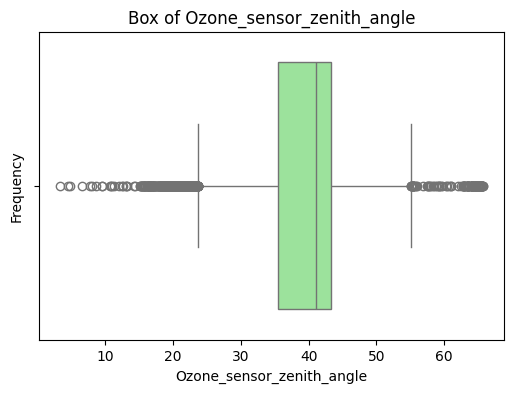

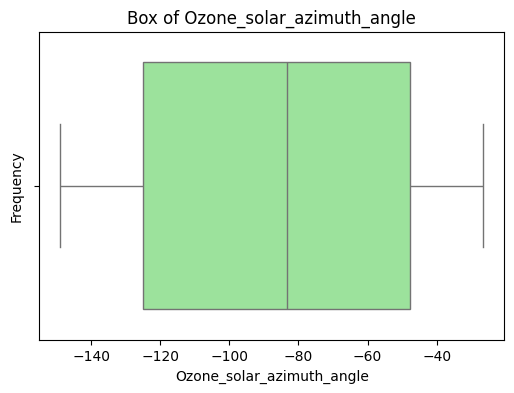

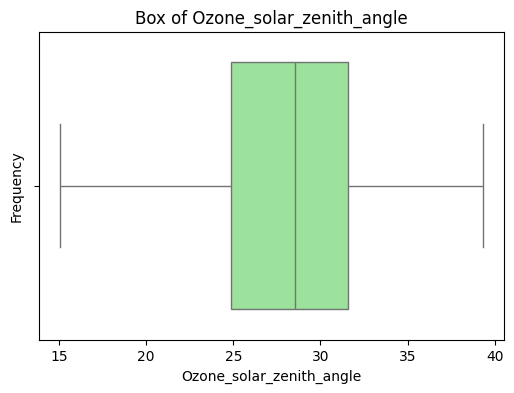

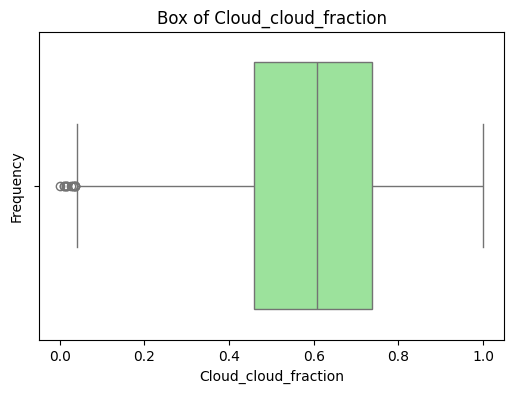

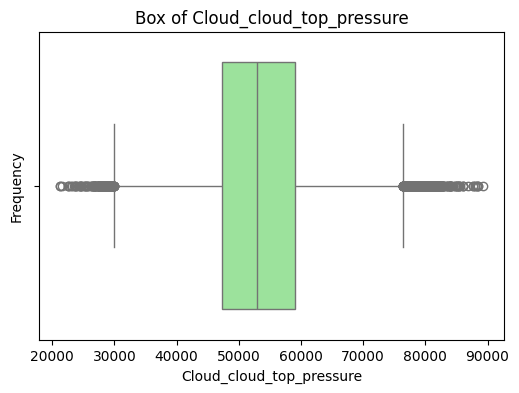

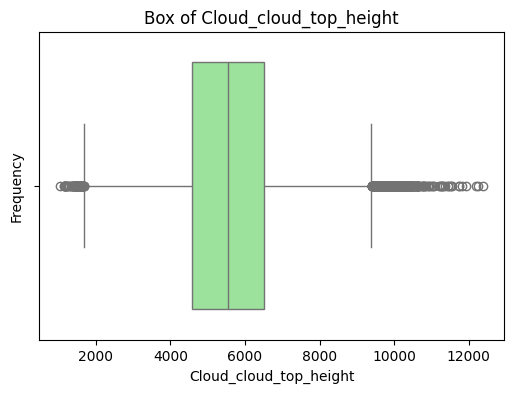

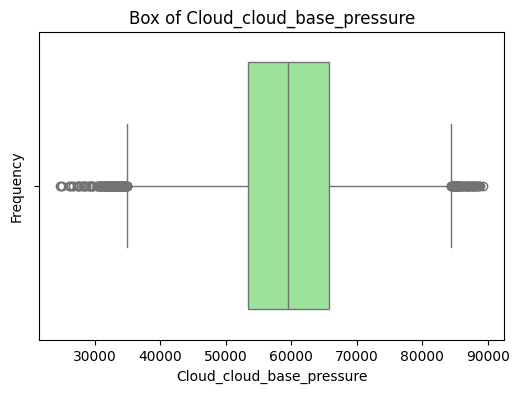

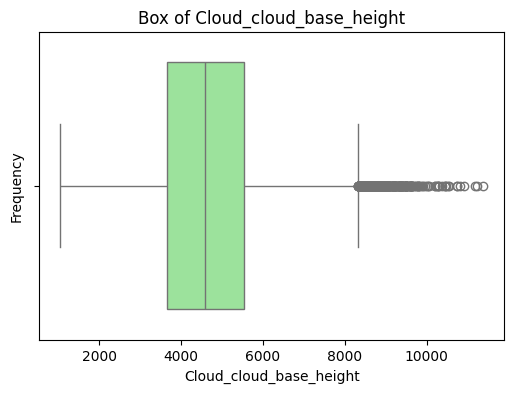

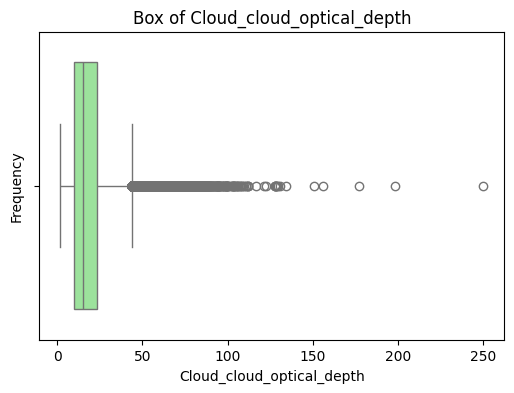

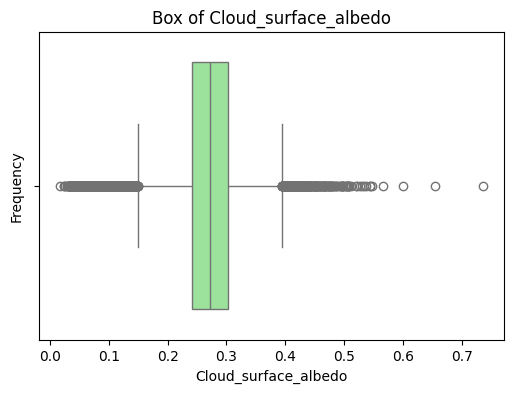

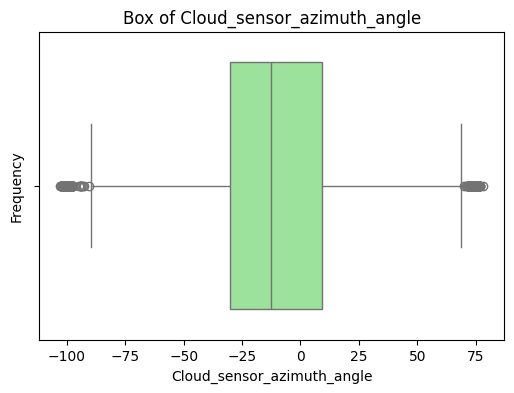

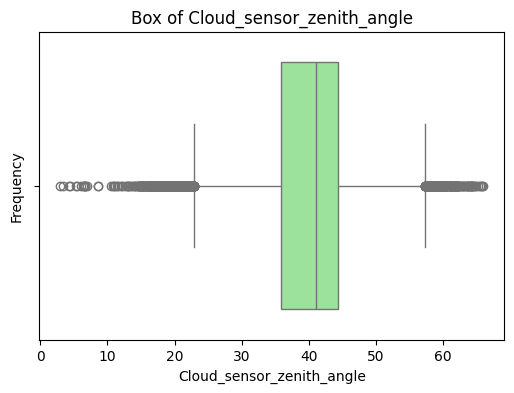

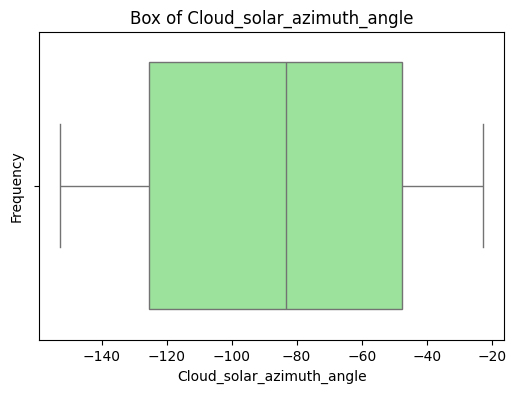

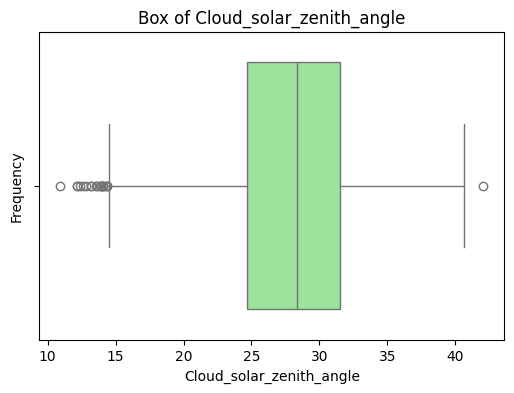

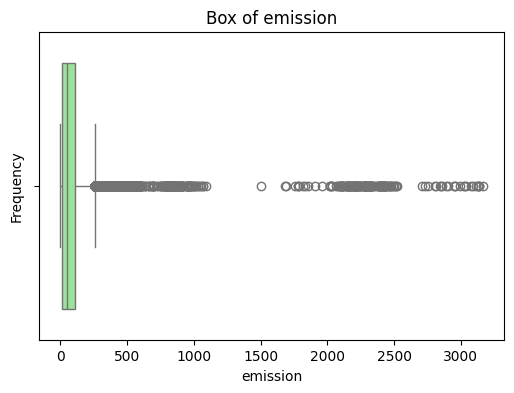

In [68]:
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Box of {column}')
    plt.show()

In Boxplot, there are some columns which are having some outliers, We will identify them and treat them. Removing Outlier is not a suitable option here because if we do so we may be left with very less data. So imputing with median.

In [69]:
# def remove_outliers_iqr(df,column_name):

#     # Calculate the IQR for the specified column
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Remove rows with outliers
#     df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

#     return df_no_outliers
# df_no_outlier = remove_outliers_iqr(df, numerical_columns)

In [70]:
df_new.drop(columns='ID_LAT_LON_YEAR_WEEK', inplace=True) #Droping the column as it is not necessary

In [71]:
def impute_outliers_with_medin(data, column_name):
    # Calculate the mean of the 'CO2' column
    median_value = data[column_name].median()

    # Calculate quartiles (Q1, Q3) and IQR using np.percentile
    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)
    IQR = Q3 - Q1

    # Define Lower Fence (LF) and Upper Fence (UF)
    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    # Replace the outlier values with the mean value
    data[column_name] = np.where((data[column_name] < LF) | (data[column_name] > UF), median_value,data[column_name])

    return data

In [72]:
df_no_outliers = impute_outliers_with_medin(df_new, df_new.columns)

Defining independent and target Features

In [73]:
x = df_no_outliers.drop(columns='emission')
y = df_no_outliers['emission']

### Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_tranformed = scaler.transform(x_test)

## Training Model

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_tranformed)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse, r2_score(y_test,y_pred) 

(27.06357520839592, 0.09512159742196724)

### RandomForest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rr =  RandomForestRegressor()
rr.fit(x_train_transformed, y_train)
y_pred = rr.predict(x_test_tranformed)

In [80]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse, r2_score(y_test,y_pred) 

(9.477937547158707, 0.8890192713618286)

Random forest is the best model compared to Linear regression. <3
>